# STUDY ON OPEN COURSE DATA OF 2019 & 2020

In [301]:
#importing necessary libraries pandas, numpy ,matplotlib, seaborn and scipy

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 
import networkx as nx

%matplotlib inline

In [302]:
#Reading both files 
df1=pd.read_excel("D:\\Coding\\Uni Project\\Data\\Allotment-Data-2019.xlsx")
df2=pd.read_excel("D:\\Coding\\Uni Project\\Data\\Allotment-Data-2020.xlsx")

<Axes: >

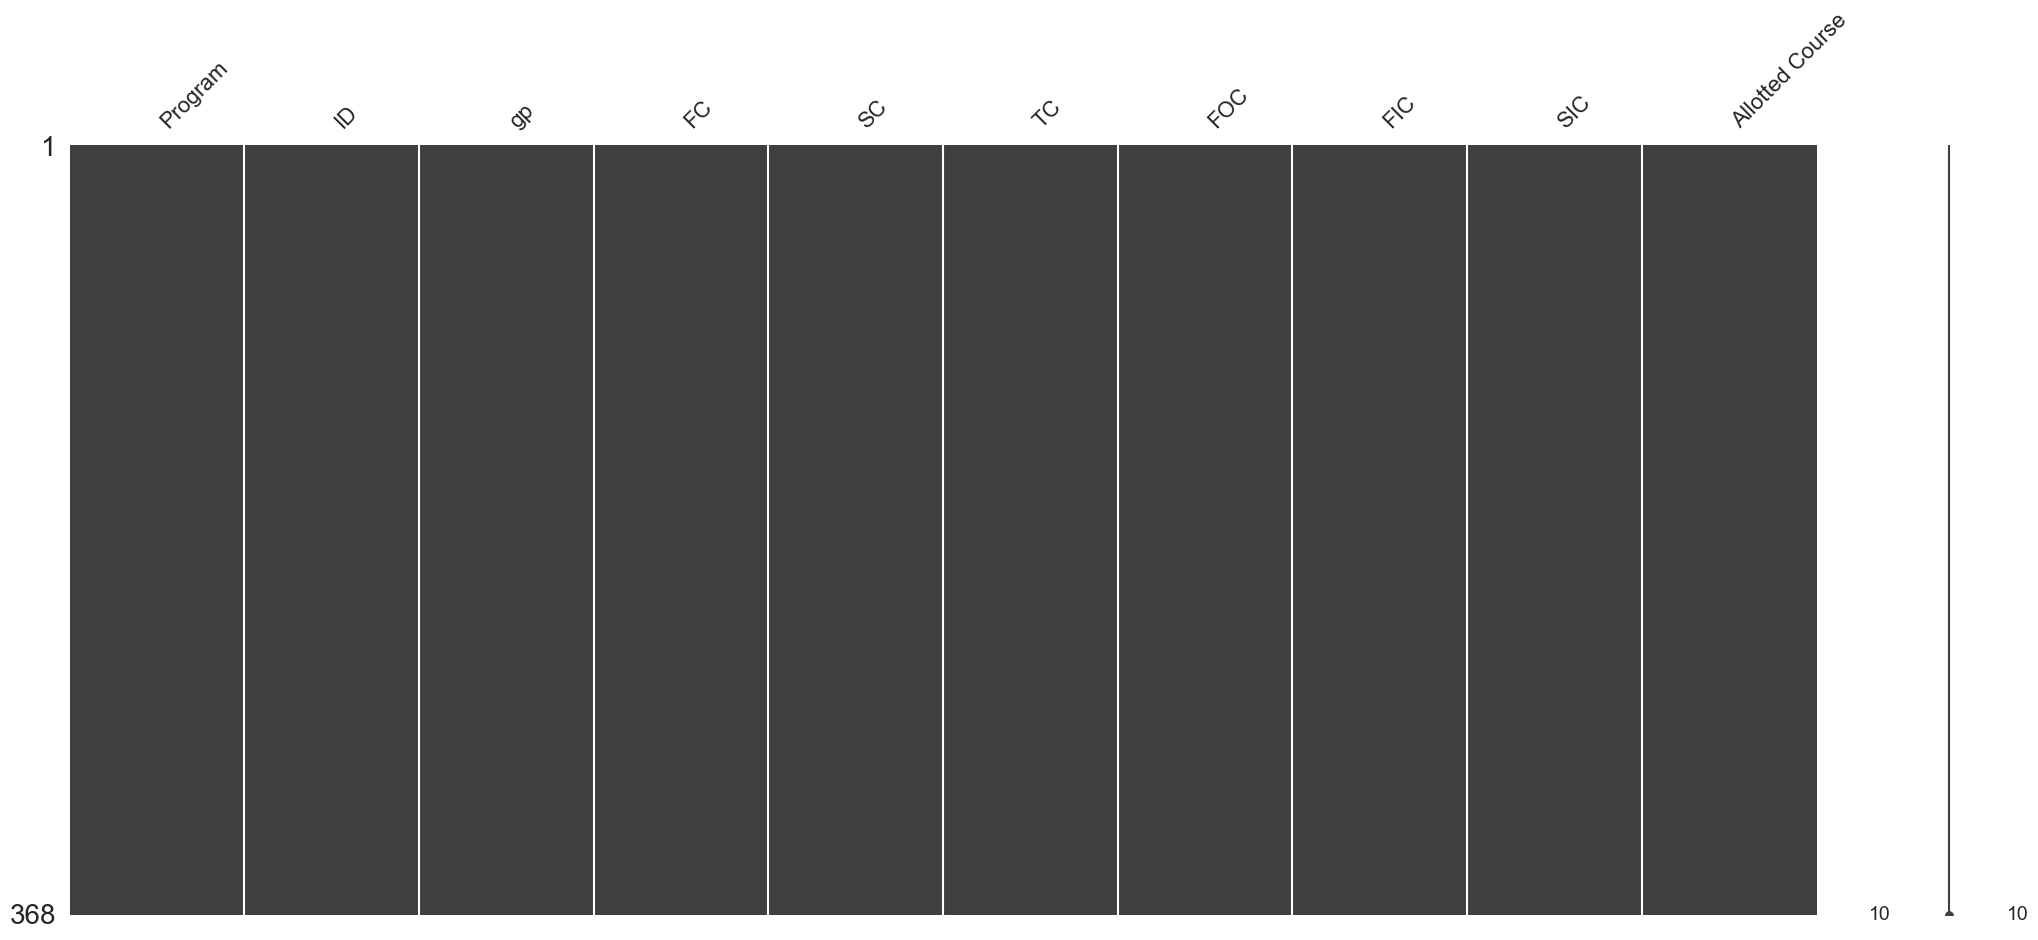

In [303]:
#checking for missing values
import missingno as msno 
msno.matrix(df1)

<Axes: >

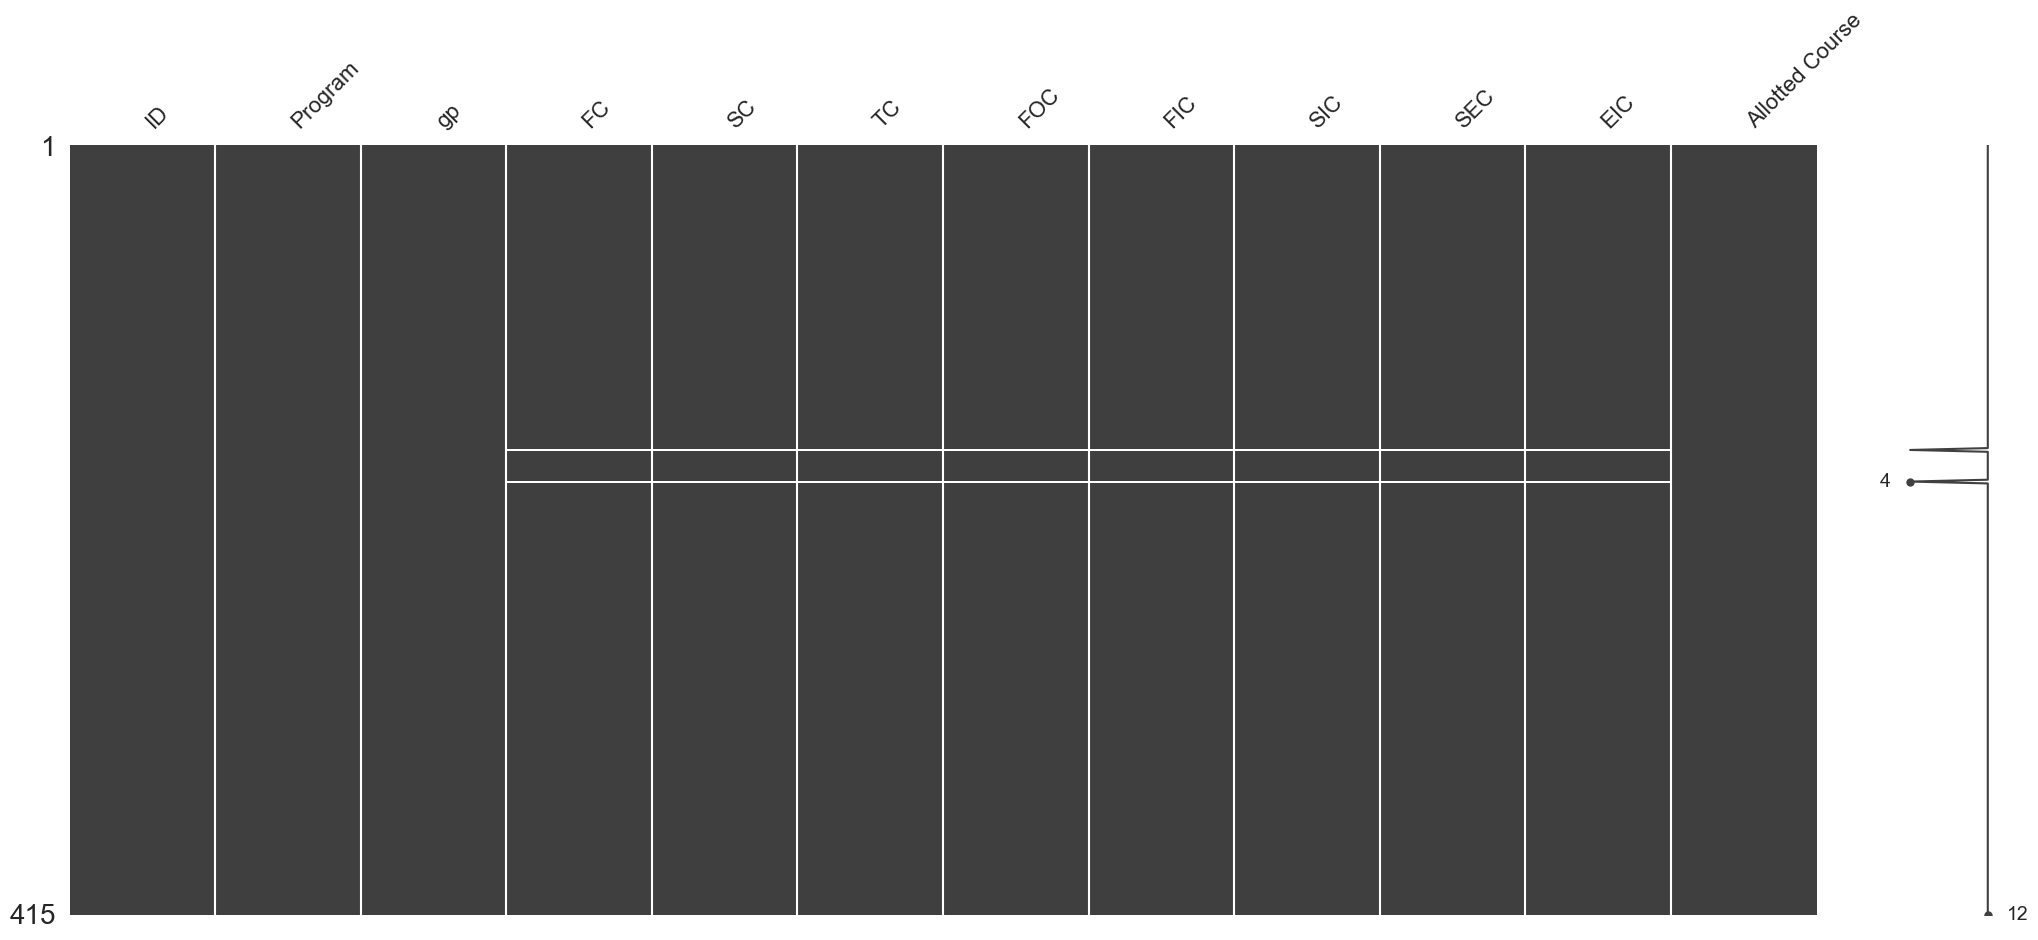

In [304]:
msno.matrix(df2)

**Removing Rows Where Choices are Missing.**

In [305]:
df2.dropna(subset="FC",inplace = True)

## EXPLORATORY DATA ANALYSIS [EDA]

In [306]:
df1.head()

Program    ID         gp  FC  SC  TC FOC FIC SIC Allotted Course
0  B.A Economics  1001  19.000000  EN  SO  EC  HN  HI  MA              EN
1  B.A Economics  1002  15.498155  EN  HI  HN  PH  SO  ST              EN
2  B.A Economics  1003   0.000000  HI  SO  HN  BO  CO  ZO              HN
3  B.A Economics  1004  44.100000  SO  ST  CH  CO  HN  ZO              SO
4  B.A Economics  1005  51.600000  HI  ST  CO  SO  EN  ZO              HI

In [307]:
df2.head()

ID        Program    gp  FC  SC  TC FOC FIC SIC SEC EIC Allotted Course
0  1000  B.A Economics  11.9  PE  SO  EN  ZO  BO  HI  CO  ST              BO
1  1001  B.A Economics  24.1  EN  HN  SO  HI  CO  MA  ST  PE              EN
2  1002  B.A Economics  38.2  SO  EN  HN  ZO  BO  HI  CO  ST              EN
3  1003  B.A Economics  47.3  EN  SO  CO  PE  ST  HI  HN  PH              EN
4  1004  B.A Economics  56.5  CO  SO  HI  ST  EN  HN  MA  PE              CO

In [308]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Program          368 non-null    object 
 1   ID               368 non-null    int64  
 2   gp               368 non-null    float64
 3   FC               368 non-null    object 
 4   SC               368 non-null    object 
 5   TC               368 non-null    object 
 6   FOC              368 non-null    object 
 7   FIC              368 non-null    object 
 8   SIC              368 non-null    object 
 9   Allotted Course  368 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 28.9+ KB


In [309]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 414
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               413 non-null    int64  
 1   Program          413 non-null    object 
 2   gp               413 non-null    float64
 3   FC               413 non-null    object 
 4   SC               413 non-null    object 
 5   TC               413 non-null    object 
 6   FOC              413 non-null    object 
 7   FIC              413 non-null    object 
 8   SIC              413 non-null    object 
 9   SEC              413 non-null    object 
 10  EIC              413 non-null    object 
 11  Allotted Course  413 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 41.9+ KB


In [310]:
#No of Rows & Columns from 2019
row_19,col_19 = df1.shape
print("No. of Rows = ", row_19)
print("No. of Columns = ",col_19)

No. of Rows =  368
No. of Columns =  10


In [311]:
#No of Rows & Columns from 2020
row_20,col_20 = df2.shape
print("No. of Rows = ", row_20)
print("No. of Columns = ",col_20)

No. of Rows =  413
No. of Columns =  12


In [312]:
#finding all of the columns names of 2019 data
print(df1.columns)

Index(['Program', 'ID', 'gp', 'FC', 'SC', 'TC', 'FOC', 'FIC', 'SIC',
       'Allotted Course'],
      dtype='object')


In [313]:
#finding all of the columns names of 2020 data
df2.columns

Index(['ID', 'Program', 'gp', 'FC', 'SC', 'TC', 'FOC', 'FIC', 'SIC', 'SEC',
       'EIC', 'Allotted Course'],
      dtype='object')

## GROSS PERCENTAGE STATS

In [314]:
#summary statistics of grade point of 2019
df1["gp"].describe()

count    368.000000
mean      60.167792
std       21.110175
min        0.000000
25%       45.666667
50%       64.875000
75%       76.166667
max       92.250000
Name: gp, dtype: float64

In [315]:
#summary statistics of grade point of 2020
df2["gp"].describe()

count    413.000000
mean      64.509550
std       20.593058
min        0.000000
25%       49.700000
50%       69.500000
75%       81.333333
max       93.333333
Name: gp, dtype: float64

In [316]:
df1.groupby("Program")["gp"].describe().round(2)

count   mean    std    min    25%    50%    75%    max
Program                                                                 
B.A Economics      35.0  47.70  22.44   0.00  32.82  44.10  70.30  76.90
B.A English        35.0  58.44  20.54  10.60  37.90  63.80  75.60  87.40
B.A Hindi          22.0  45.50  23.93   7.00  26.10  47.00  62.67  84.17
B.A History        36.0  46.51  17.07  13.40  32.98  49.20  55.98  87.20
B.A Sociology      33.0  43.22  21.45   5.00  29.00  44.60  59.00  87.70
B.Com Model I      50.0  65.70  16.78  23.00  60.04  71.71  76.98  88.58
B.Sc Botany        28.0  68.84  13.90  31.17  64.19  71.21  79.62  85.42
B.Sc Chemistry     24.0  76.37  15.43  34.83  67.33  82.46  87.77  92.25
B.Sc Mathematics   25.0  76.67  12.67  36.24  70.48  76.50  87.17  91.92
B.Sc Physics       23.0  67.99  18.20  29.17  56.88  75.08  79.79  89.75
B.Sc Statistics    29.0  71.97  10.47  47.67  65.58  74.08  78.08  88.67
B.Sc Zoology       28.0  61.14  16.95  24.17  52.63  65.09  74.17  88.50

In [317]:
df2.groupby("Program")["gp"].describe().round(2)

count   mean    std    min    25%    50%    75%    max
Program                                                                 
B.A Economics      49.0  56.23  22.00   8.70  38.20  58.80  74.90  87.20
B.A English        40.0  64.24  16.89  30.50  48.00  68.20  79.80  88.70
B.A Hindi          29.0  55.04  22.11  16.33  35.50  48.33  76.17  90.83
B.A History        42.0  50.29  22.92   0.00  36.65  54.25  66.55  89.50
B.A Sociology      43.0  53.02  15.75  15.60  43.95  55.90  62.45  81.70
B.Com Model I      51.0  75.01  16.00  27.67  67.96  79.58  87.21  93.33
B.Sc Botany        23.0  64.07  22.31  15.50  54.92  73.92  78.46  87.08
B.Sc Chemistry     26.0  75.69  16.32  37.00  71.19  82.87  86.73  92.83
B.Sc Mathematics   25.0  78.30  12.02  50.58  75.67  81.33  86.50  90.67
B.Sc Physics       29.0  76.24  12.36  38.58  69.33  80.25  85.25  93.17
B.Sc Statistics    27.0  76.47  16.57  29.25  71.58  81.58  88.88  92.25
B.Sc Zoology       29.0  63.07  16.63  28.92  50.33  65.92  78.42  89.08

In [318]:
avg_gp_2019 = df1.groupby('Program')['gp'].mean().round(2)
avg_gp_2019= pd.DataFrame(avg_gp_2019)
print("Average GP of Departments in 2019")
print(avg_gp_2019)
      
print()

avg_gp_2020 = df2.groupby('Program')['gp'].mean().round(2)
avg_gp_2020= pd.DataFrame(avg_gp_2020)
print("Average GP of Departments in 2020")
print(avg_gp_2020)

Average GP of Departments in 2019
                     gp
Program                
B.A Economics     47.70
B.A English       58.44
B.A Hindi         45.50
B.A History       46.51
B.A Sociology     43.22
B.Com Model I     65.70
B.Sc Botany       68.84
B.Sc Chemistry    76.37
B.Sc Mathematics  76.67
B.Sc Physics      67.99
B.Sc Statistics   71.97
B.Sc Zoology      61.14

Average GP of Departments in 2020
                     gp
Program                
B.A Economics     56.23
B.A English       64.24
B.A Hindi         55.04
B.A History       50.29
B.A Sociology     53.02
B.Com Model I     75.01
B.Sc Botany       64.07
B.Sc Chemistry    75.69
B.Sc Mathematics  78.30
B.Sc Physics      76.24
B.Sc Statistics   76.47
B.Sc Zoology      63.07


In [319]:
#top 3 depts. allotted from depts in 2019
pop_elect_19a = df1.groupby('Allotted Course')['Program'].value_counts().groupby(level=1).nlargest(3)
pop_elect_19a = pop_elect_19a.reset_index(level=-1, drop=True)
pop_elect_19a = pd.DataFrame(pop_elect_19a)
pop_elect_19a.to_csv("pop_csv_files/pop_elect_19a.csv")

In [320]:
#top 3 depts. allotted in 2020
pop_elect_20a = df2.groupby('Allotted Course')['Program'].value_counts().groupby(level=1).nlargest(3)
pop_elect_20a = pop_elect_20a.reset_index(level=-1, drop=True)
pop_elect_20a = pd.DataFrame(pop_elect_20a)
pop_elect_20a.to_csv("pop_csv_files/pop_elect_20a.csv")


In [321]:
#top 3 depts. received to departments in 2019
pop_elect_19r = df1.groupby('Program')['Allotted Course'].value_counts().groupby(level=1).nlargest(3)
pop_elect_19r = pop_elect_19r.reset_index(level=-1, drop=True)
pop_elect_19r = pd.DataFrame(pop_elect_19r)
pop_elect_19r.to_csv("pop_csv_files/pop_elect_19r.csv")


In [322]:
#top 3 depts. received to departments in 2020
pop_elect_20r = df2.groupby('Program')['Allotted Course'].value_counts().groupby(level=1).nlargest(3)
pop_elect_20r = pop_elect_20r.reset_index(level=-1, drop=True)
pop_elect_20r = pd.DataFrame(pop_elect_20r)
pop_elect_20r.to_csv("pop_csv_files/pop_elect_20r.csv")


In [323]:
#top 3 first choices from departments
pop_from_fc19 = df1.groupby('FC')['Program'].value_counts().groupby(level=1).nlargest(3)
pop_from_fc19 = pop_from_fc19.reset_index(level=-1, drop=True)
pop_from_fc19 = pd.DataFrame(pop_from_fc19)
pop_from_fc19.to_csv("pop_csv_files/pop_from_fc19.csv")


In [324]:
#top 3 first choices from departments
pop_from_fc20 = df2.groupby('FC')['Program'].value_counts().groupby(level=1).nlargest(3)
pop_from_fc20 = pop_from_fc20.reset_index(level=-1, drop=True)
pop_from_fc20 = pd.DataFrame(pop_from_fc20)
pop_from_fc20.to_csv("pop_csv_files/pop_from_fc20.csv")


In [325]:
#top 3 first choices to departments
pop_to_fc19 = df1.groupby('Program')['FC'].value_counts().groupby(level=1).nlargest(3)
pop_to_fc19 = pop_to_fc19.reset_index(level=-1, drop=True)
pop_to_fc19 = pd.DataFrame(pop_to_fc19)
pop_to_fc19.to_csv("pop_csv_files/pop_to_fc19.csv")

In [326]:
#top 3 first choices to departments
pop_to_fc20 = df2.groupby('Program')['FC'].value_counts().groupby(level=1).nlargest(3)
pop_to_fc20 = pop_to_fc20.reset_index(level=-1, drop=True)
pop_to_fc20 = pd.DataFrame(pop_to_fc20)
pop_to_fc20.to_csv("pop_csv_files/pop_to_fc20.csv")


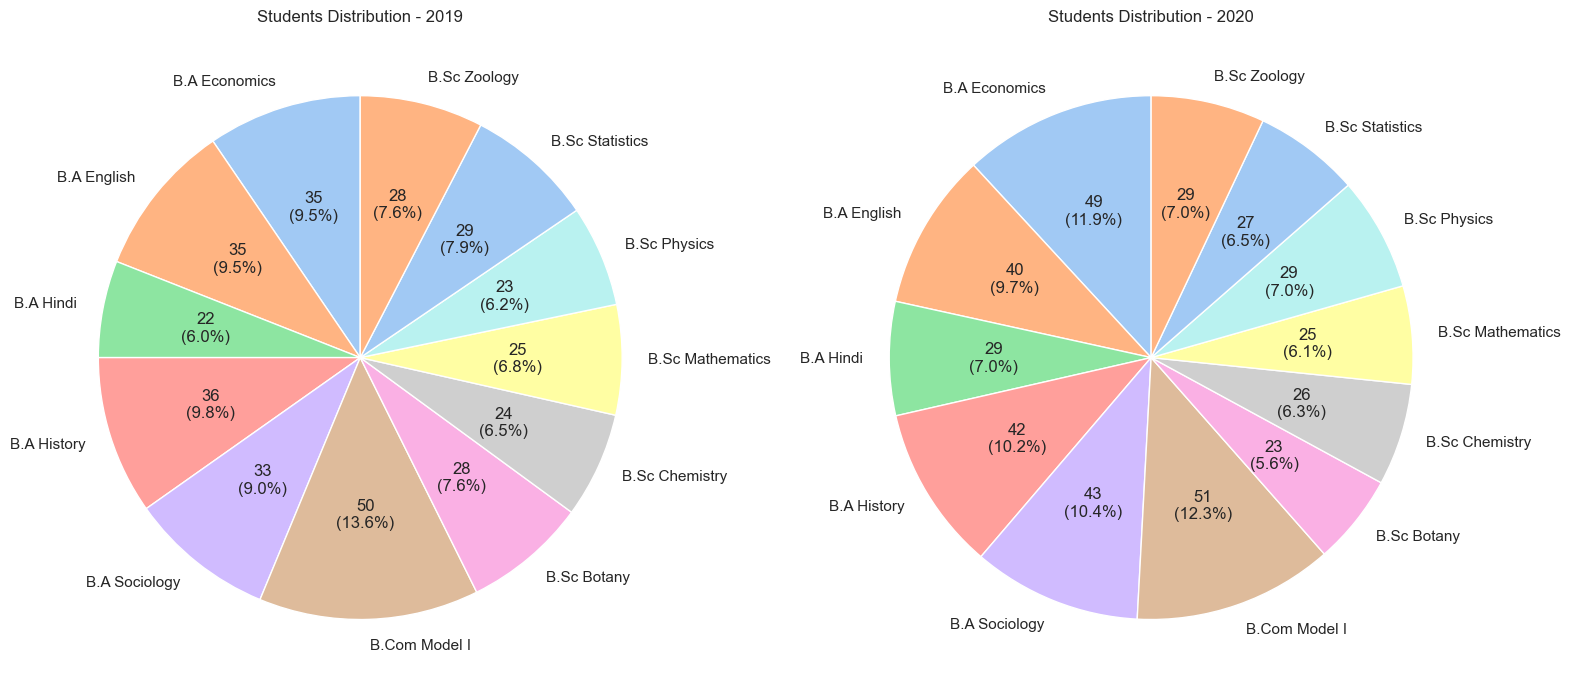

In [380]:
# Define data for the first plot
program_count1 = df1['Program'].value_counts()
program1_names = program_count1.index
program1_values = program_count1.values

# Define data for the second plot
program_count2 = df2['Program'].value_counts()
program2_names = program_count2.index
program2_values = program_count2.values

# Combine the data
combined_names = np.unique(np.concatenate([program1_names, program2_names]))
combined_values1 = np.zeros_like(combined_names, dtype=int)
combined_values2 = np.zeros_like(combined_names, dtype=int)
for i, name in enumerate(combined_names):
    if name in program1_names:
        combined_values1[i] = program1_values[np.where(program1_names == name)[0][0]]
    if name in program2_names:
        combined_values2[i] = program2_values[np.where(program2_names == name)[0][0]]
        
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for 2019
axs[0].pie(combined_values1, labels=combined_names, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(combined_values1) / 100, p), startangle=90, colors=sns.color_palette("pastel"))
axs[0].set_title('Students Distribution - 2019')

# Plot the pie chart for 2020
axs[1].pie(combined_values2, labels=combined_names, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(combined_values2) / 100, p), startangle=90, colors=sns.color_palette("pastel"))
axs[1].set_title('Students Distribution - 2020')

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("Charts/Pie-chart/Students-Distribution.png")

# Show the plot
plt.show()

In [328]:
# select the rows where none of the column values from FC, SC, TC, FOC, FIC, SIC equals to the value in the column named Allotted Course
result = df1[(df1['FC'] != df1['Allotted Course']) & 
            (df1['SC'] != df1['Allotted Course']) &
            (df1['TC'] != df1['Allotted Course']) &
            (df1['FOC'] != df1['Allotted Course']) &
            (df1['FIC'] != df1['Allotted Course']) &
            (df1['SIC'] != df1['Allotted Course'])]

# select the Register number column from the result DataFrame
register_numbers = result[['ID','Program','gp']]

# print the register numbers where none of the column values from FC, SC, TC, FOC, FIC, SIC equals to the value in the column named Allotted Course
print(register_numbers)

Empty DataFrame
Columns: [ID, Program, gp]
Index: []


In [329]:
# select the rows where none of the column values from FC, SC, TC, FOC, FIC, SIC equals to the value in the column named Allotted Course
result = df2[(df2['FC'] != df2['Allotted Course']) & 
            (df2['SC'] != df2['Allotted Course']) &
            (df2['TC'] != df2['Allotted Course']) &
            (df2['FOC'] != df2['Allotted Course']) &
            (df2['FIC'] != df2['Allotted Course']) &
            (df2['SIC'] != df2['Allotted Course'])]

# select the Register number column from the result DataFrame
register_numbers = result[['ID','Program','gp']]

# print the register numbers where none of the column values from FC, SC, TC, FOC, FIC, SIC equals to the value in the column named Allotted Course
print(register_numbers)

       ID        Program         gp
20   1020  B.A Economics  67.700000
38   1038  B.A Economics  65.100000
66   1066    B.A English  30.500000
99   1099      B.A Hindi  43.666667
109  1109      B.A Hindi  18.500000
133  1133    B.A History  47.900000


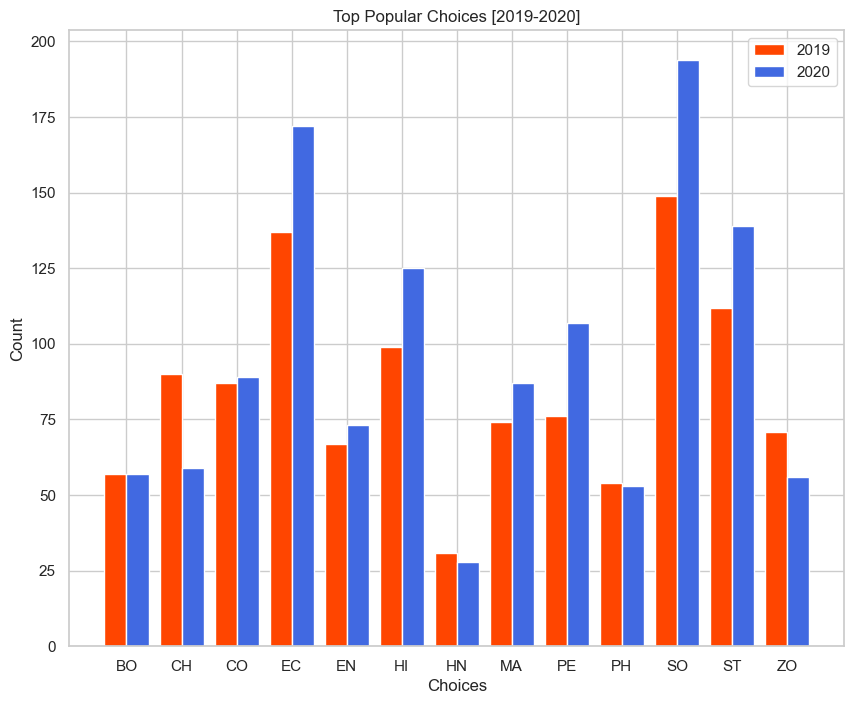

In [330]:
# define the data
elective_choices = ['FC', 'SC', 'TC']
elective_counts1 = df1[elective_choices].stack().value_counts()
elective_counts2 = df2[elective_choices].stack().value_counts()

# combine the counts for each choice from both years into a single array
choices = np.unique(list(elective_counts1.index) + list(elective_counts2.index))
counts1 = np.array([elective_counts1.get(c, 0) for c in choices])
counts2 = np.array([elective_counts2.get(c, 0) for c in choices])

# set the positions of the bars for each choice
bar_width = 0.4
r1 = np.arange(len(choices))
r2 = [x + bar_width for x in r1]

# plot the bars for each year side by side
plt.figure(figsize=(10,8))
plt.bar(r1, counts1, width=bar_width, edgecolor='white', label='2019',color = "orangered")
plt.bar(r2, counts2, width=bar_width, edgecolor='white', label='2020',color = "royalblue")

# add labels and legend
plt.xlabel('Choices')
plt.ylabel('Count')
plt.xticks([r + bar_width/2 for r in range(len(choices))], choices)
plt.title('Top Popular Choices [2019-2020]')
plt.legend()

# show the plot
plt.savefig("Charts/Bar-plots/Pop-choices-both.png")
plt.show()


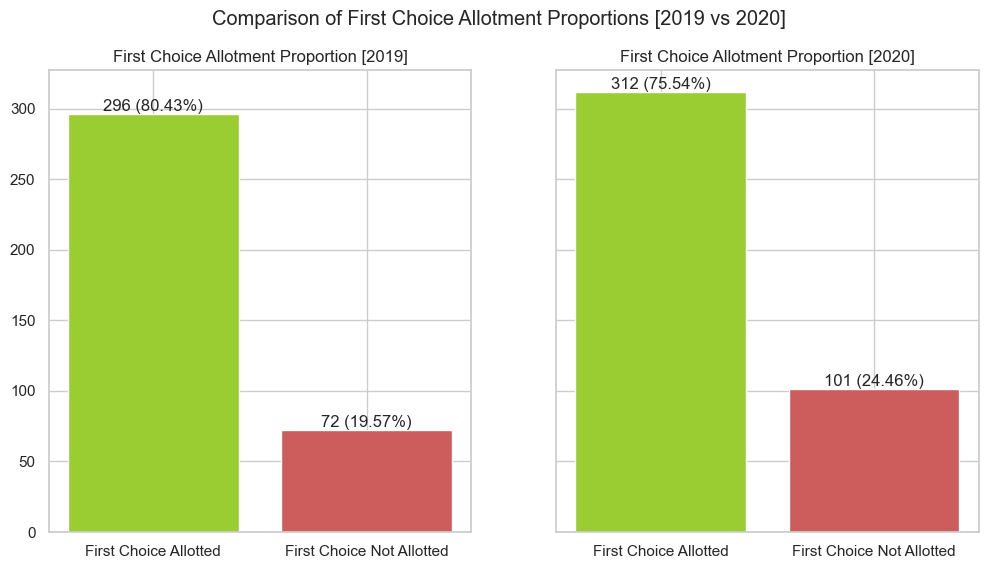

In [331]:
# Assuming df1 and df2 are your DataFrames for 2019 and 2020, and row_19 and row_20 are their respective total row counts

# Plotting for 2019
preferred_allotment_counts_2019 = df1.apply(lambda x: x['Allotted Course'] in x[['FC']].values, axis=1).value_counts()

# Calculate proportions
proportions_2019 = preferred_allotment_counts_2019 / row_19 * 100

# Plotting for 2020
preferred_allotment_counts_2020 = df2.apply(lambda x: x['Allotted Course'] in x[['FC']].values, axis=1).value_counts()

# Calculate proportions
proportions_2020 = preferred_allotment_counts_2020 / row_20 * 100

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot for 2019
axes[0].bar(['First Choice Allotted', 'First Choice Not Allotted'], preferred_allotment_counts_2019.values, color=['yellowgreen', 'indianred'])
axes[0].set_title("First Choice Allotment Proportion [2019]")

# Annotate the bar values with both count and proportion
for i, value in enumerate(preferred_allotment_counts_2019.values):
    bar_height = value
    annotation_y = bar_height + 0.1  # Adjust the offset as needed
    annotation_text = str(value) + " (" + f"{proportions_2019.iloc[i]:.2f}%)"
    axes[0].annotate(annotation_text, (i, annotation_y), ha='center', va='bottom')

# Plot for 2020
axes[1].bar(['First Choice Allotted', 'First Choice Not Allotted'], preferred_allotment_counts_2020.values, color=['yellowgreen', 'indianred'])
axes[1].set_title("First Choice Allotment Proportion [2020]")

# Annotate the bar values with both count and proportion
for i, value in enumerate(preferred_allotment_counts_2020.values):
    bar_height = value
    annotation_y = bar_height + 0.1  # Adjust the offset as needed
    annotation_text = str(value) + " (" + f"{proportions_2020.iloc[i]:.2f}%)"
    axes[1].annotate(annotation_text, (i, annotation_y), ha='center', va='bottom')

# Set common labels and title
fig.suptitle("Comparison of First Choice Allotment Proportions [2019 vs 2020]")
plt.savefig("Charts/Bar-plots/FA-FC-ALlot-Prop.png")

# Show the plot
plt.show()


## DATA VISUALIZATIONS

In [332]:
#gp change from 2019 to 2020
gp_change = ((avg_gp_2020.iloc[:,0]- avg_gp_2019.iloc[:,0])/avg_gp_2019.iloc[:,0])*100
gp_change= pd.DataFrame(gp_change).reset_index()
sns.set(style="whitegrid")

### 1. BARPLOTS

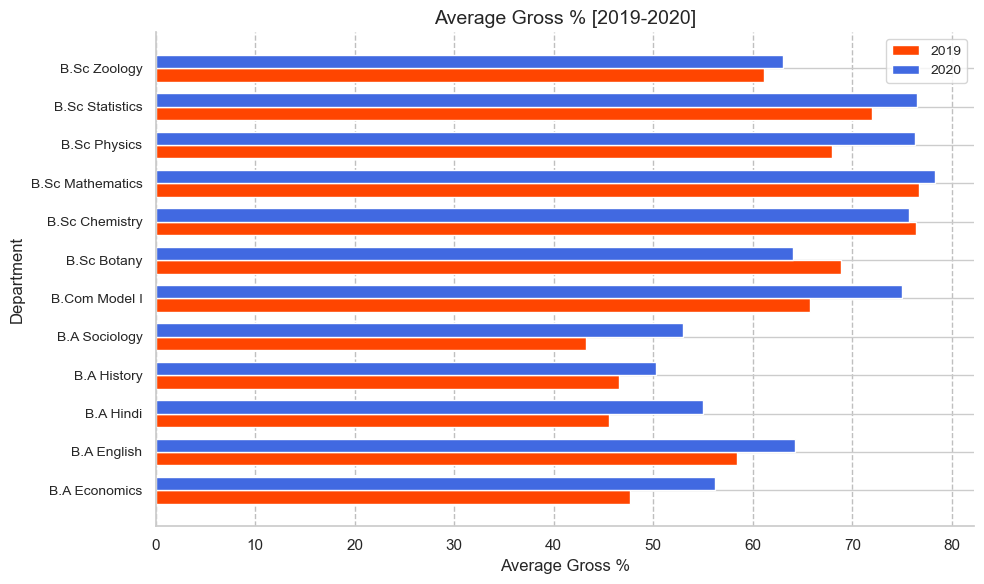

In [333]:
# Define the data for 2019
df1_gp_avg = df1.groupby(['Program'])['gp'].mean().reset_index()
gp_2019 = df1_gp_avg['gp'].values
programs = df1_gp_avg['Program'].values

# Define the data for 2020
df2_gp_avg = df2.groupby(['Program'])['gp'].mean().reset_index()
gp_2020 = df2_gp_avg['gp'].values

# Set the positions of the bars for each department
bar_height = 0.35
r1 = np.arange(len(programs))
r2 = [x + bar_height for x in r1]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for 2019 and 2020 side by side
ax.barh(r1, gp_2019, height=bar_height, edgecolor='white', label='2019',color="orangered")
ax.barh(r2, gp_2020, height=bar_height, edgecolor='white', label='2020',color= "royalblue")

# Add labels and legend
ax.set_ylabel('Department', fontsize=12)
ax.set_xlabel('Average Gross %', fontsize=12)
ax.set_yticks([r + bar_height/2 for r in range(len(programs))])
ax.set_yticklabels(programs, fontsize=10)
ax.set_title('Average Gross % [2019-2020]', fontsize=14)

# Add a legend
ax.legend(loc='upper right', fontsize=10)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a grid for better readability
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("Charts/Bar-plots/Mean-GP-Dept-Bargraph.png")

# Show the plot
plt.show()

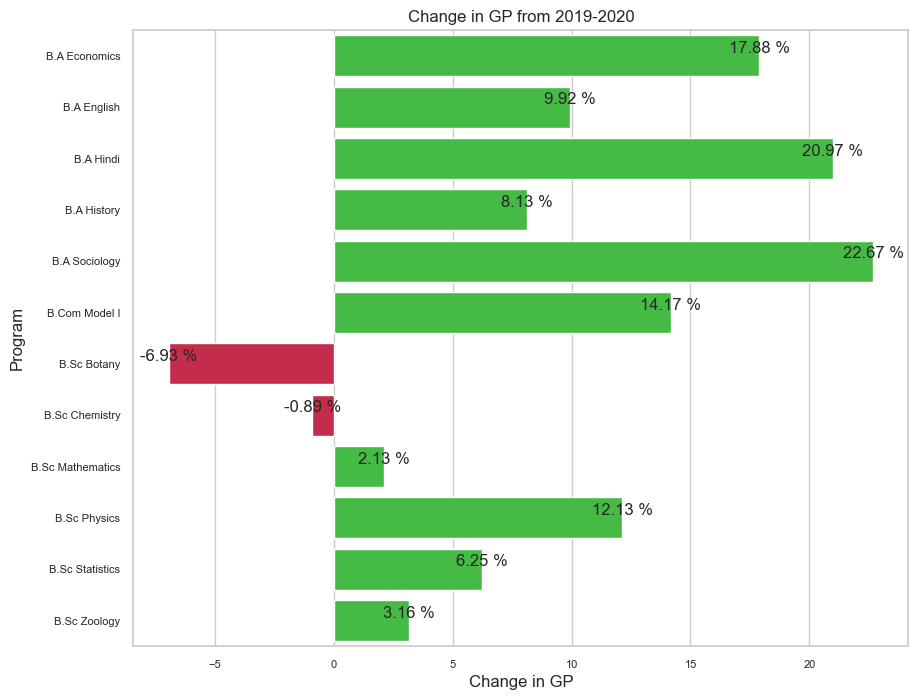

In [334]:
# Define a custom color palette
colors = []
for gp in gp_change['gp']:
    if gp > 0:
        colors.append('limegreen')  # Blue for positive GP
    else:
        colors.append('crimson')  # Red for negative GP

# Create the barplot with custom color palette
plt.figure(figsize=(10,8))
plt.title("Change in GP from 2019-2020")
sns.barplot(y="Program", x="gp", data=gp_change, hue = "Program",palette=colors)

# Annotate the bar values with two decimal places
for i, value in enumerate(gp_change['gp']):
    formatted_value = "{:.2f} %".format(value)  # Format to two decimal places
    plt.annotate(formatted_value, xy=(value, i), ha='center', va='bottom')
    
# Adjust axis font size
plt.gca().xaxis.set_tick_params(labelsize=8)
plt.gca().yaxis.set_tick_params(labelsize=8)

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Change in GP')
plt.savefig("Charts/Bar-plots/GP-Change-Bar.png")
plt.show()

### 2. HISTOGRAM

C:\Users\Agus RT\AppData\Local\Temp\ipykernel_14032\3457537385.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.gp, ax=ax, label="GP [2019]", hist_kws={'alpha': 0.7})
C:\Users\Agus RT\AppData\Local\Temp\ipykernel_14032\3457537385.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.gp,

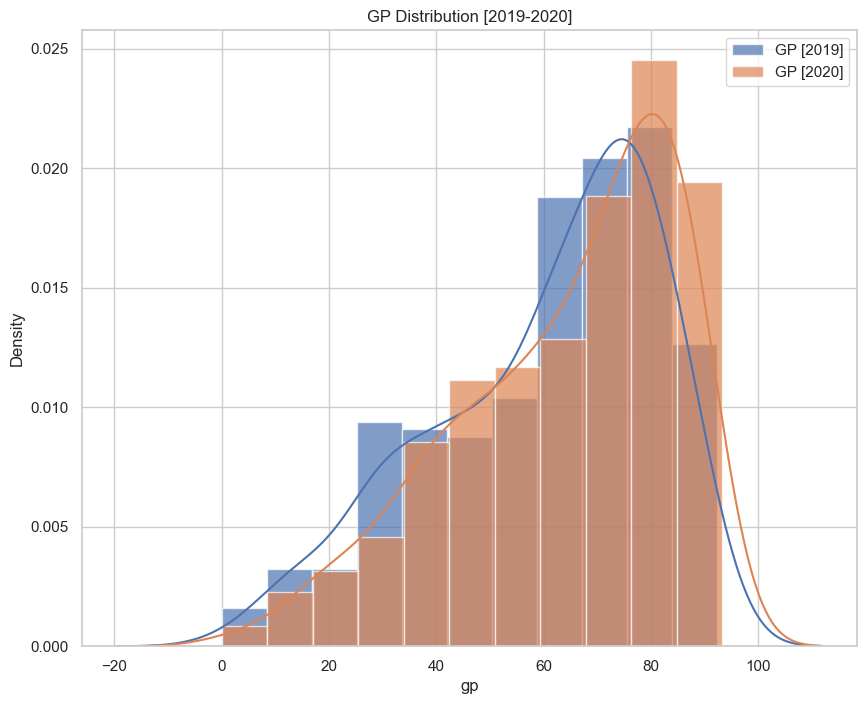

In [335]:
fig, ax = plt.subplots(figsize=(10,8))

sns.distplot(df1.gp, ax=ax, label="GP [2019]", hist_kws={'alpha': 0.7})
sns.distplot(df2.gp, ax=ax, label="GP [2020]", hist_kws={'alpha': 0.7})

ax.set_title("GP Distribution [2019-2020]")
ax.legend()

# Save the plot
plt.savefig('Charts/Hist-plots/GP-Distplot.png')

# Show the plot
plt.show()

### 3. BOXPLOTS

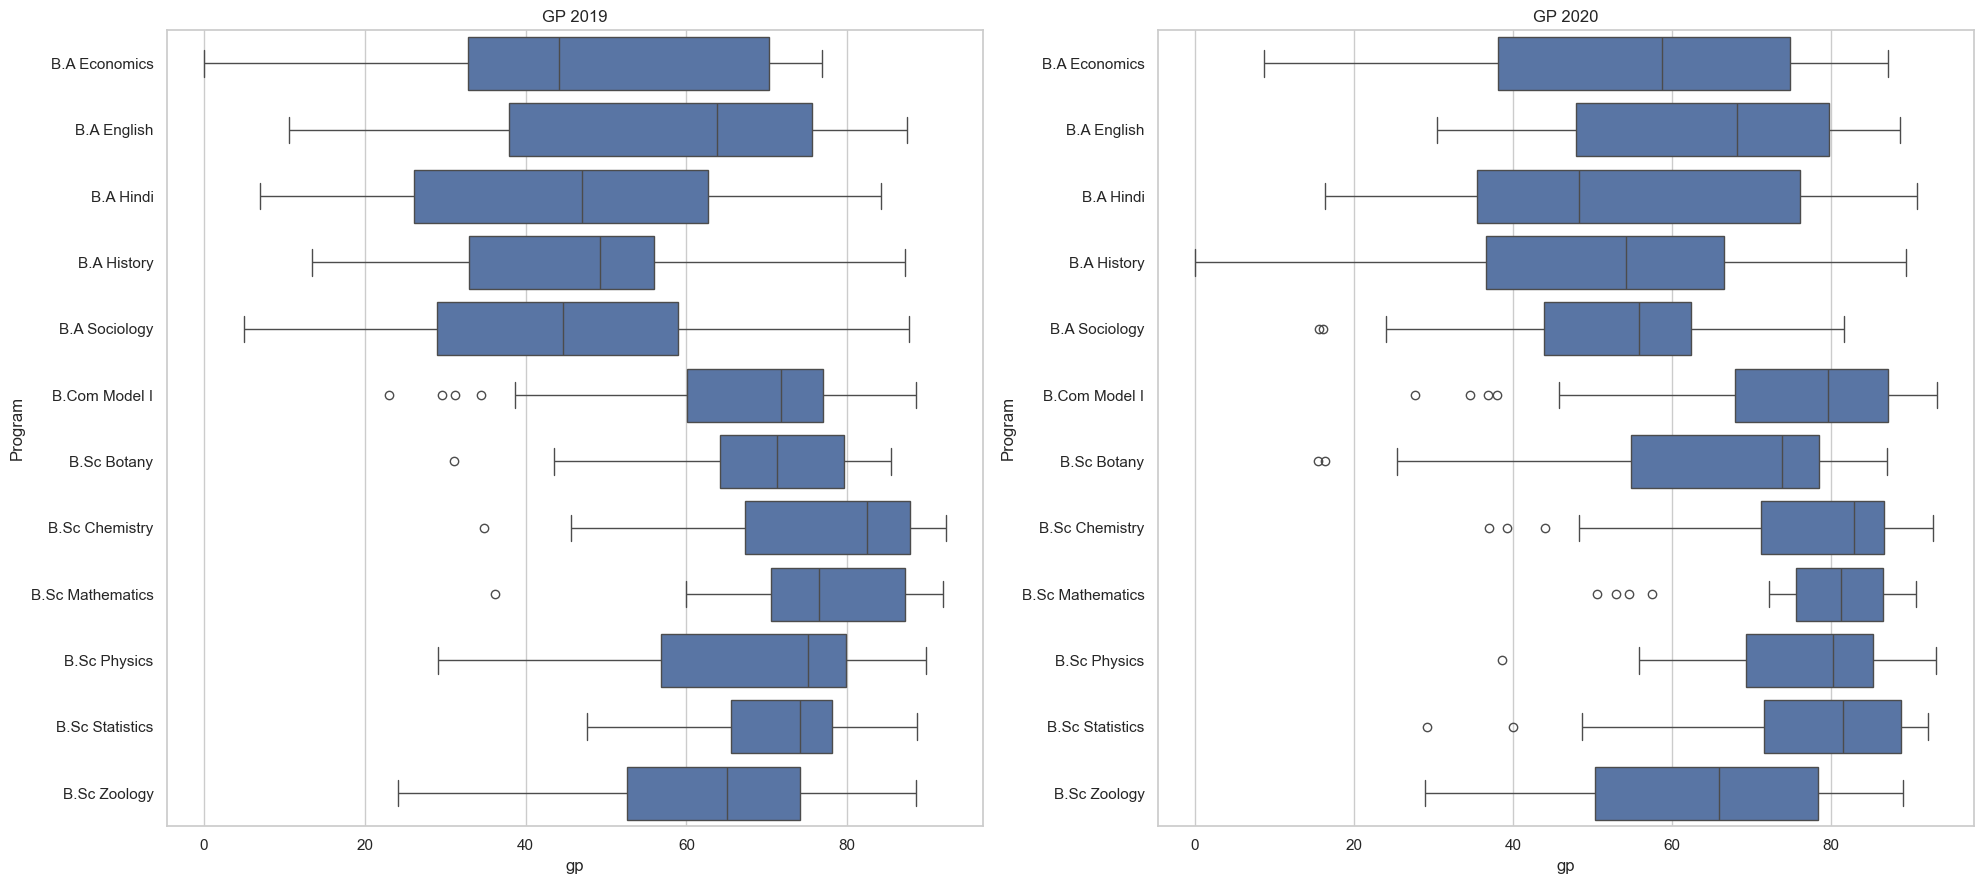

In [336]:
fig, axes = plt.subplots(1, 2, figsize=(20,9))

# First subplot for GP 2019
sns.boxplot(y="Program", x="gp", data=df1, orient='h', ax=axes[0])
axes[0].set_title('GP 2019')

# Second subplot for GP 2020
sns.boxplot(y="Program", x="gp", data=df2, orient='h', ax=axes[1])
axes[1].set_title('GP 2020')

plt.tight_layout()
plt.savefig("Charts/Box-plots/GP-Boxplot.png")
plt.show()

### 4. LINEPLOTS

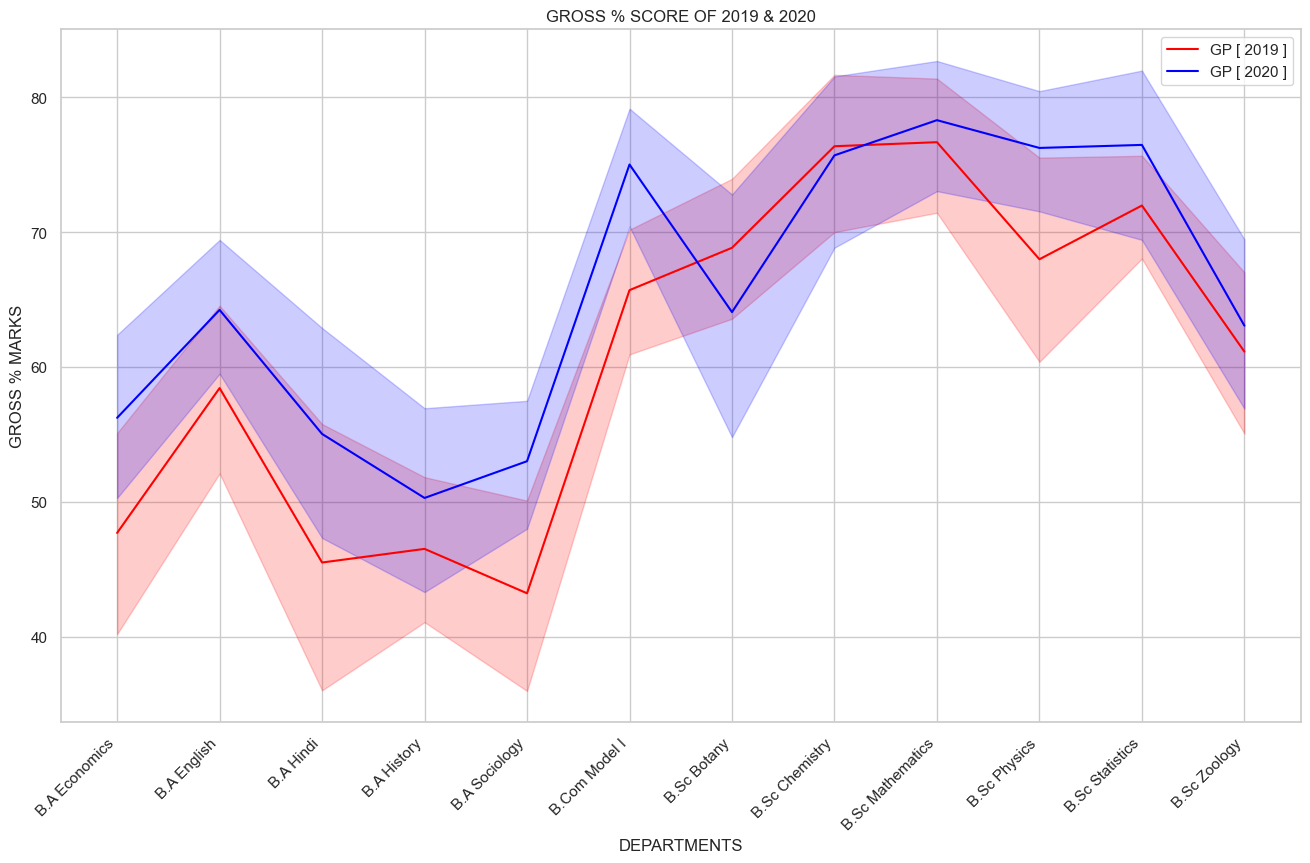

In [337]:
plt.figure(figsize=(16,9))
plt.title("GROSS % SCORE OF 2019 & 2020")
plt.xlabel("DEPARTMENTS")
plt.ylabel("GROSS % MARKS")
sns.lineplot(x="Program",
             y="gp",
             data=df1,
             color="red",
             label="GP [ 2019 ]")
sns.lineplot(x="Program",
             y="gp",
             data=df2,
             color="blue",
             label="GP [ 2020 ]")
plt.xticks(rotation=45, ha='right')
plt.savefig("Charts/Line-plots/GP-lineplot.png")
plt.show()

### 5. HEATMAPS

#### 5.1 HEATMAPS OF ALLOTMENT 

In [338]:
allot19_count = pd.crosstab(df1['Program'], df1['Allotted Course'])
allot20_count = pd.crosstab(df2['Program'], df2['Allotted Course'])


In [339]:
allot19_countr = allot19_count.copy()#Rowise transformation done for getting prop of parent depts.
allot19_countc = allot19_count.copy()
allot20_countr = allot20_count.copy()#columnwise transformation done for getting prop of parent depts.
allot20_countc = allot20_count.copy()


##### 5.1.1 ALLOTTMENT PROPORTIONS FROM PARENT DEPARTMENTS

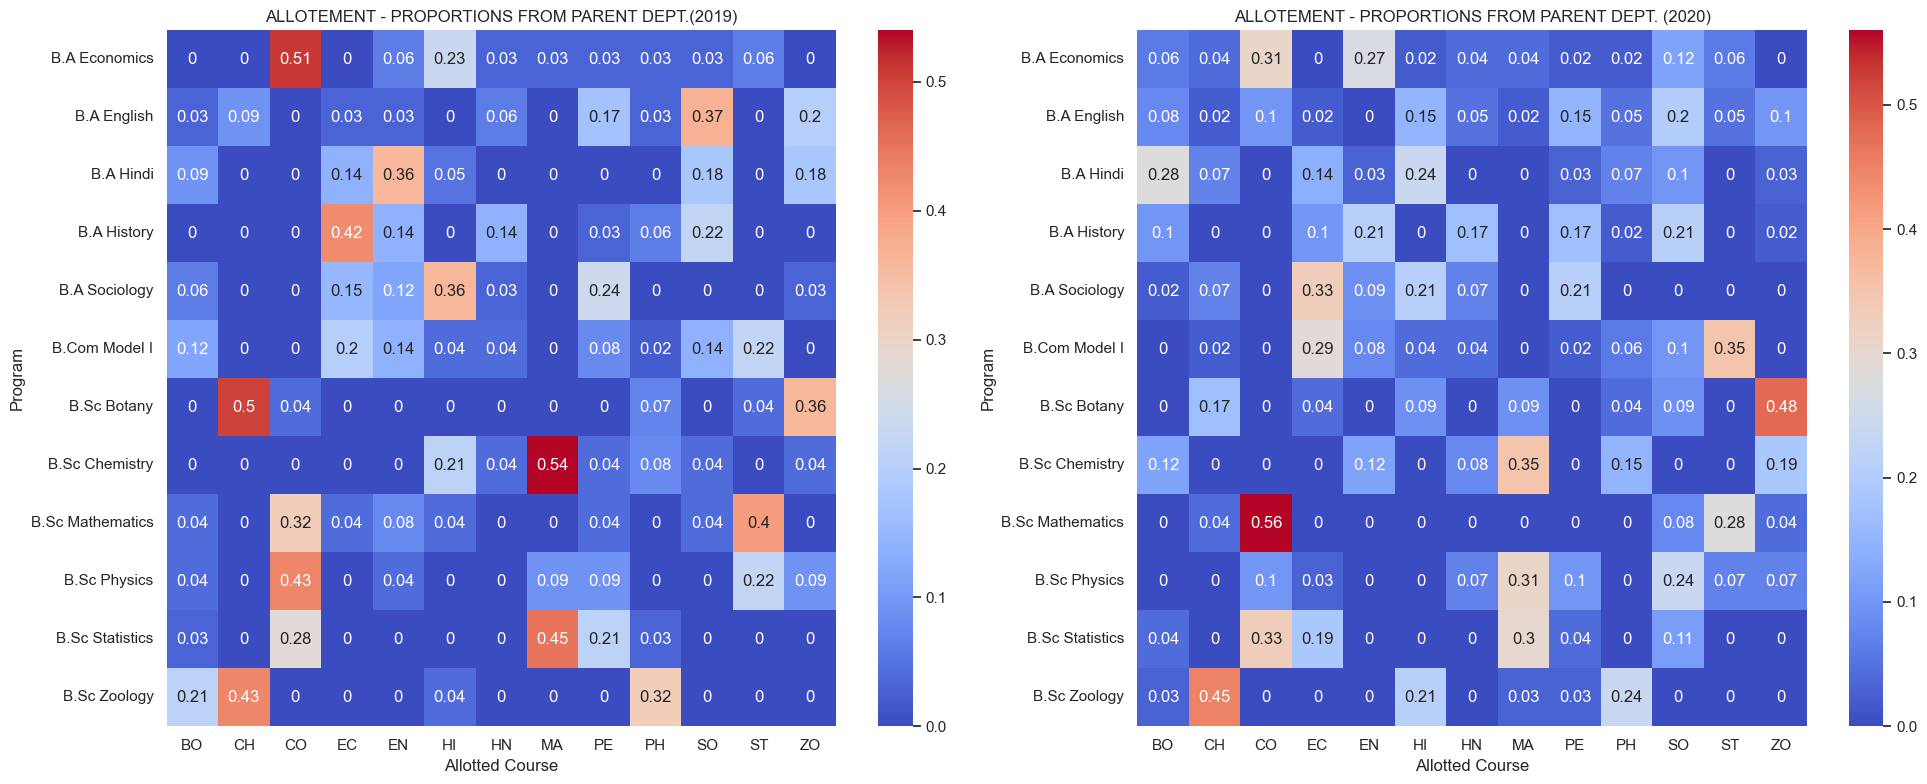

In [340]:
allot19_countr = allot19_countr.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Heatmap of Allotted Courses in 2019
fig, axes = plt.subplots(1, 2, figsize=(20,8))

axes[0].set_title("ALLOTEMENT - PROPORTIONS FROM PARENT DEPT.(2019)")
sns.heatmap(allot19_countr,
            annot=True,
            cmap="coolwarm",
            ax=axes[0])

#gets the proportional percentage of allotted students from a departments to various departments 
allot20_countr = allot20_countr.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

#Heatmap of allotted courses in 2020
axes[1].set_title("ALLOTEMENT - PROPORTIONS FROM PARENT DEPT. (2020)")
sns.heatmap(allot20_countr,
            annot = True,
            cmap="coolwarm",
            ax = axes[1])

plt.tight_layout()
plt.savefig("Charts/Heatmaps/Parent-Allot-Heatmap.png")
plt.show()

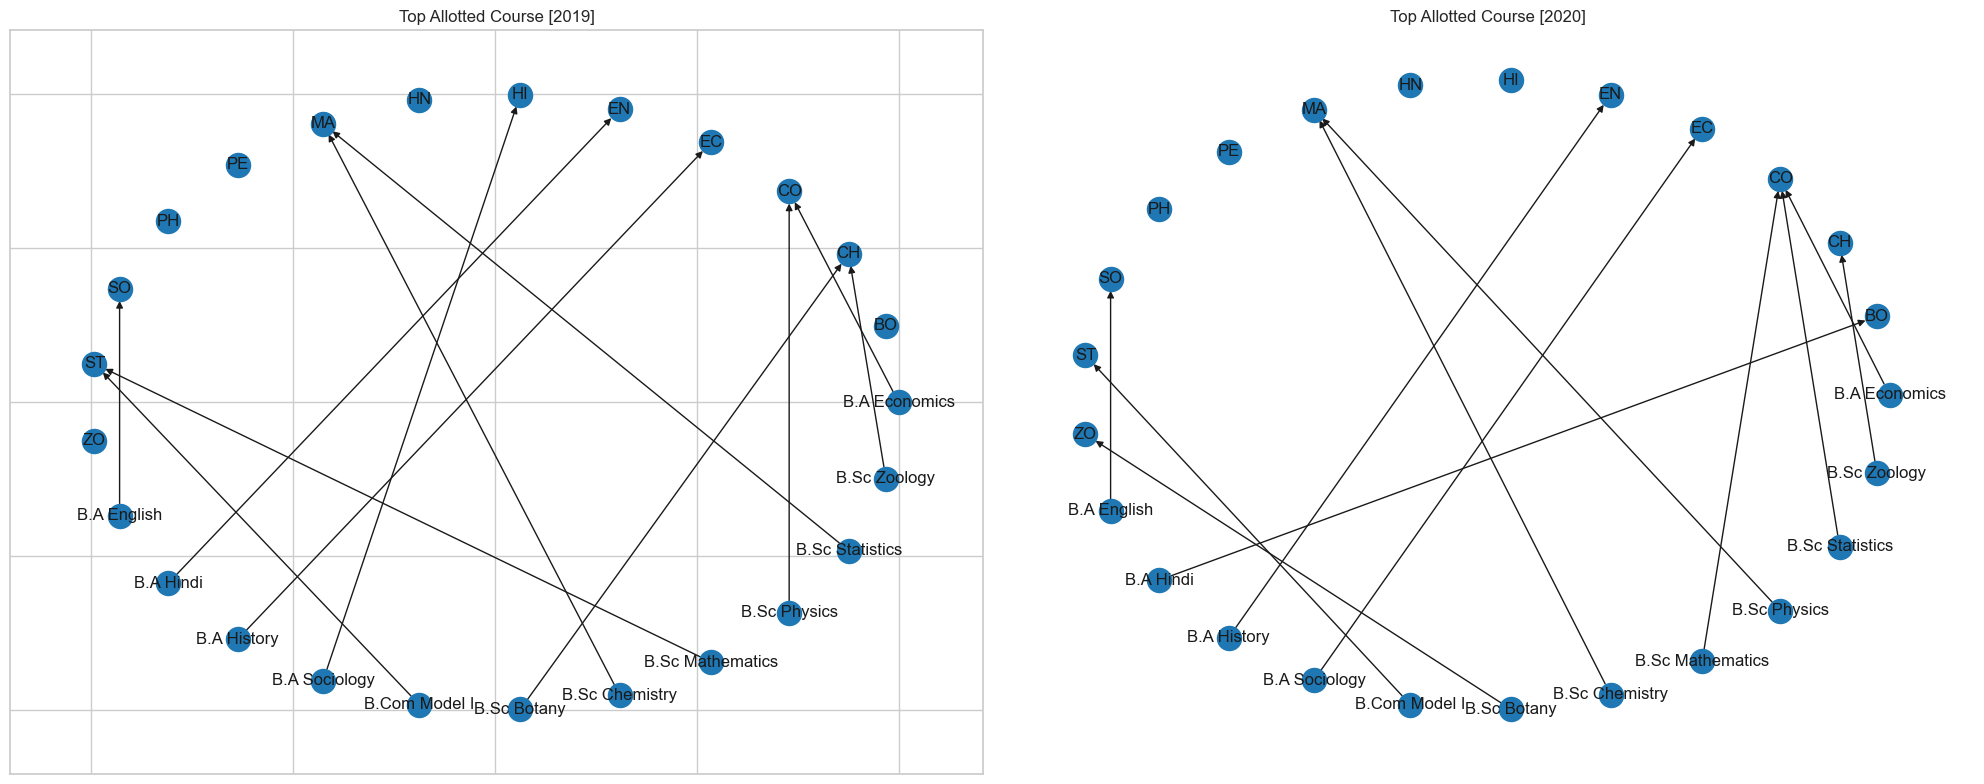

In [341]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# calculate the course with the highest number of choices for each parent department
allot_max19 = allot19_count.idxmax(axis=1)

# create the directed network graph
G = nx.DiGraph()
for programme in allot19_count.index:
    G.add_node(programme)
    for course in allot19_count.columns:
        G.add_node(course)

for programme, course in allot_max19.items():
    G.add_edge(programme, course)

# visualize the graph
pos = nx.circular_layout(G) # use circular layout
nx.draw_networkx(G, pos=pos,
                 with_labels=True,
                 font_size=12,
                 ax = axes[0])

plt.axis('off') # turn off axis labels
axes[0].set_title("Top Allotted Course [2019]")


allot_max20 = allot20_count.idxmax(axis=1)

# create the directed network graph
G = nx.DiGraph()
for programme in allot20_count.index:
    G.add_node(programme)
    for course in allot20_count.columns:
        G.add_node(course)

for programme, course in allot_max20.items():
    G.add_edge(programme, course)

# visualize the graph
pos = nx.circular_layout(G) # use circular layout
nx.draw_networkx(G, pos=pos,
                 with_labels=True,
                 font_size=12,
                 ax = axes[1])
plt.axis('off') # turn off axis labels
axes[1].set_title("Top Allotted Course [2020]")


plt.tight_layout()
plt.savefig("Charts/Network-plots/TOP-ALLOT-COURSE-NTQ.png")
plt.show()


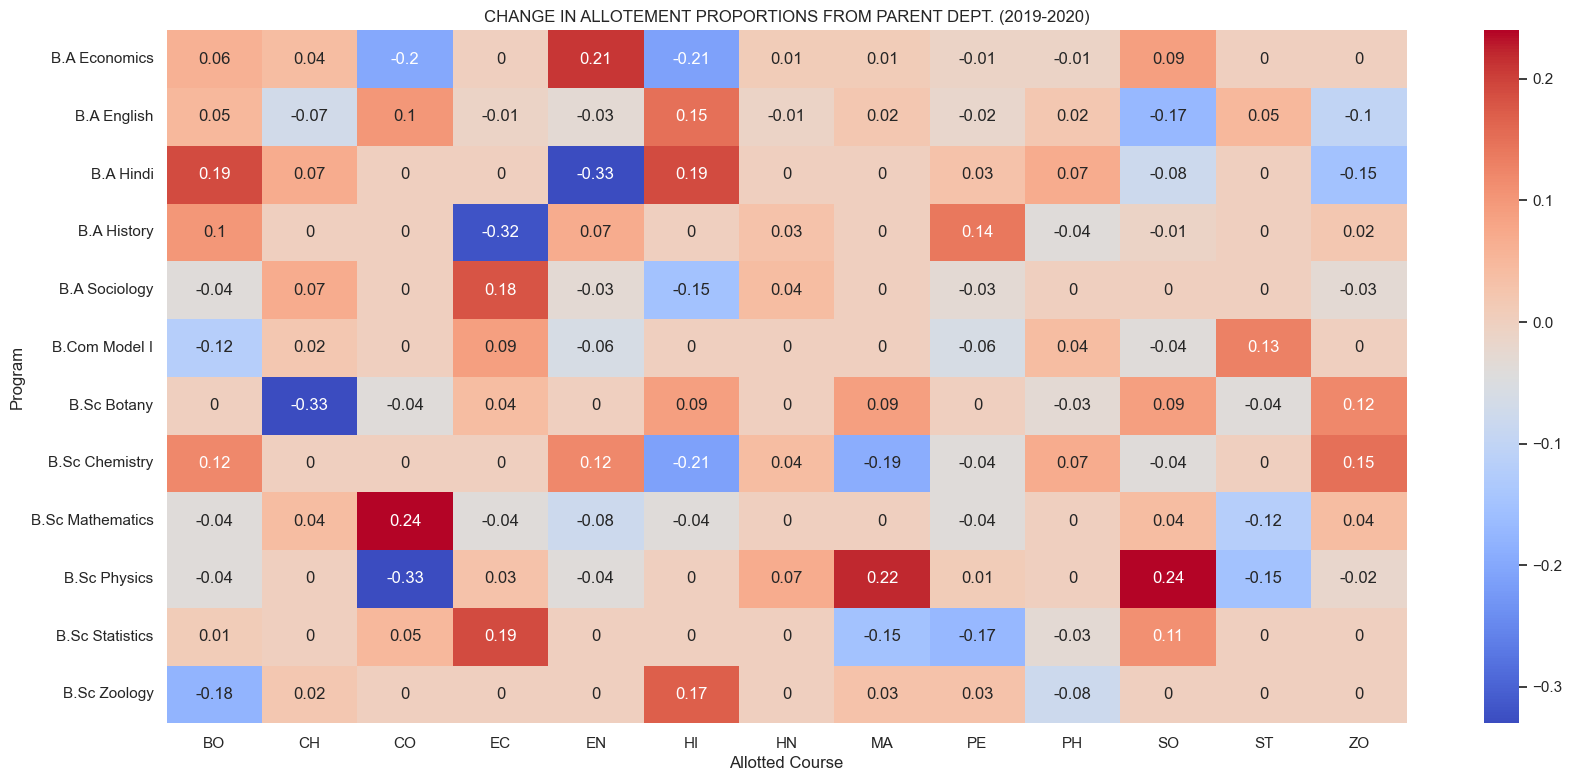

In [342]:
#Shows the difference in allotment percentage behaviours from 2019 to 2020
allot_diffr = allot20_countr - allot19_countr
plt.figure(figsize=(20,9))
plt.title("CHANGE IN ALLOTEMENT PROPORTIONS FROM PARENT DEPT. (2019-2020)")
sns.heatmap(allot_diffr,annot = True,cmap="coolwarm")
plt.savefig("Charts/Heatmaps/Parent-Allot-Change.png")
plt.show()

**ALLOTTED COURSE PROPORTION BY INDIVIDUAL DEPARTMENTS 2020**

#### Here there is an error in B.A. English, rectifying that

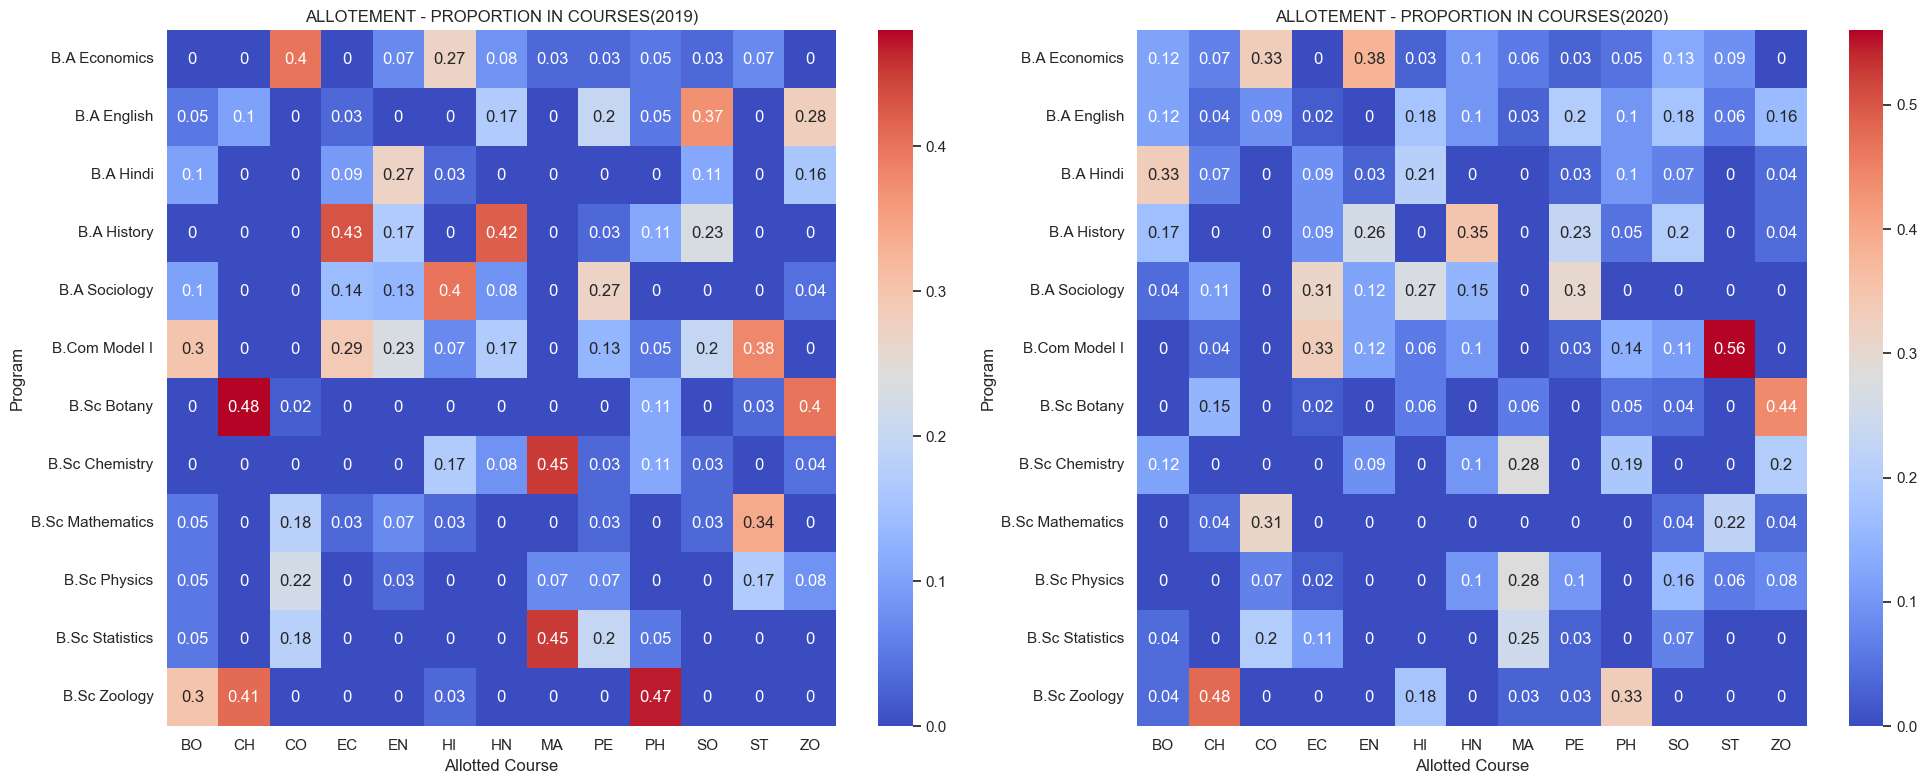

In [343]:
# Get the column proportions of the allot table

allot19_countc = allot19_countc.apply(lambda col: col / col.sum(), axis=0).astype(float).round(2)

fig, axes = plt.subplots(1, 2, figsize=(20,8))
allot19_countc.loc["B.A English","EN"] = 0

#Heatmap of Allotted Courses in 2019
axes[0].set_title("ALLOTEMENT - PROPORTION IN COURSES(2019)")
sns.heatmap(allot19_countc,
            annot = True,
            cmap="coolwarm",
            ax = axes[0])

allot20_countc = allot20_countc.apply(lambda col: col / col.sum(), axis=0).astype(float).round(2)

#Heatmap of Allotted Courses in 2020
axes[1].set_title("ALLOTEMENT - PROPORTION IN COURSES(2020)")
sns.heatmap(allot20_countc,
            annot = True,
            cmap="coolwarm",
            ax = axes[1])
plt.tight_layout()
plt.savefig("Charts/Heatmaps/Target-Allot-Heatmaps.png")
plt.show()

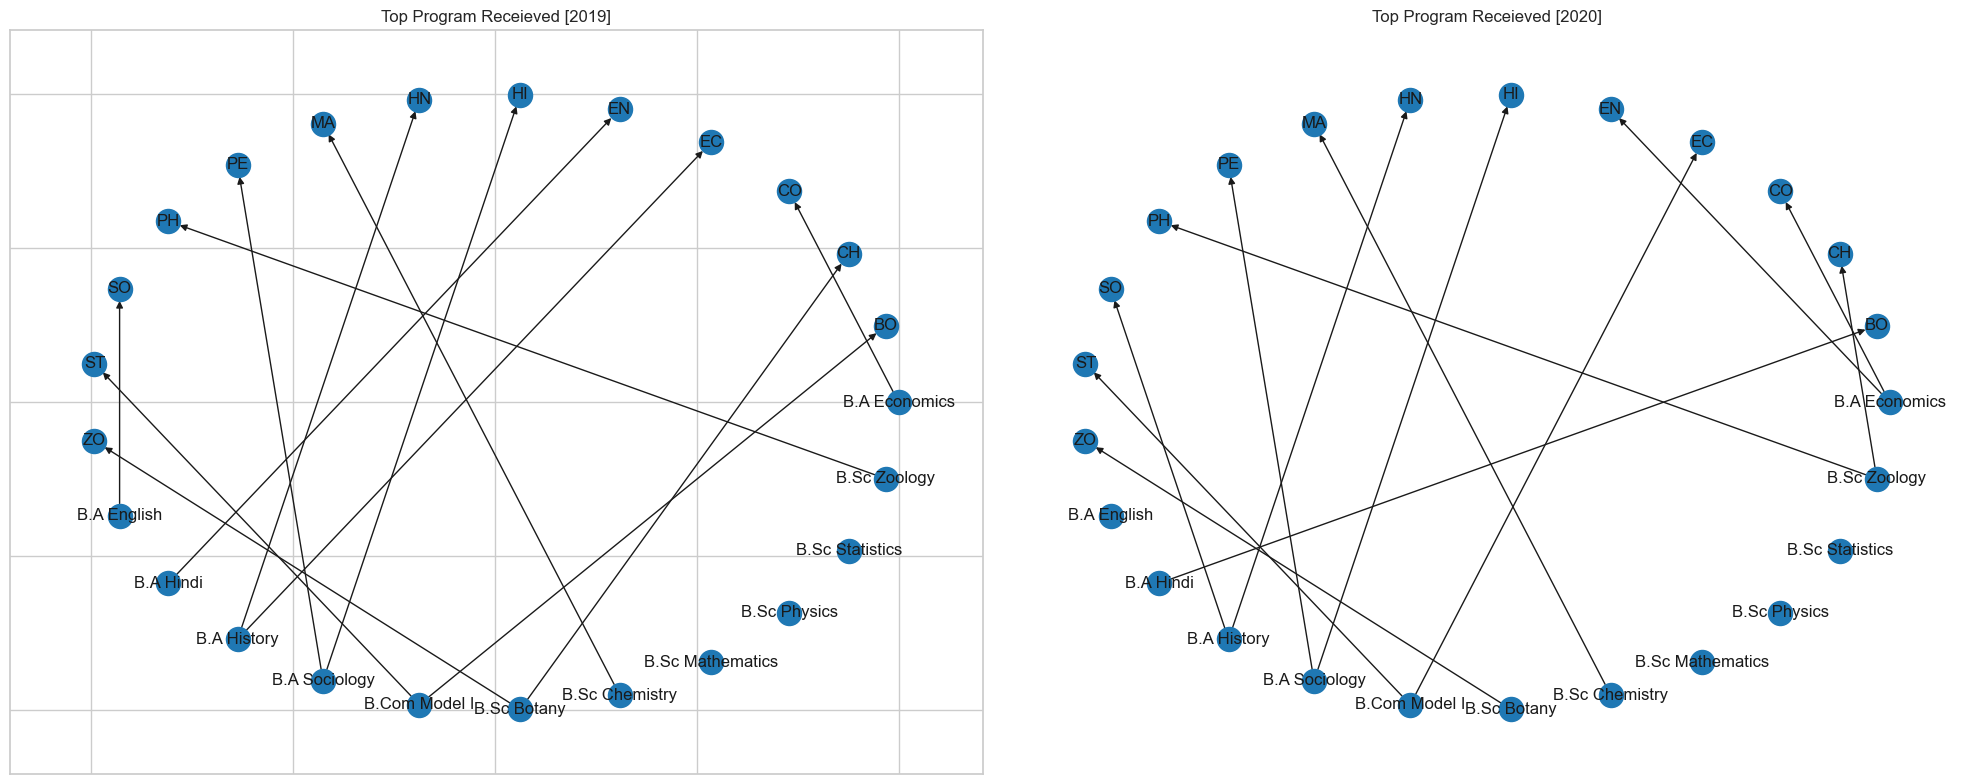

In [344]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# calculate the course with the highest number of choices for each parent department
allot_rec_max19 = allot19_count.idxmax(axis=0)

# create the directed network graph
G = nx.DiGraph()
for programme in allot19_count.index:
    G.add_node(programme)
    for course in allot19_count.columns:
        G.add_node(course)

for programme, course in allot_rec_max19.items():
    G.add_edge(course, programme)

# visualize the graph
pos = nx.circular_layout(G) # use circular layout
nx.draw_networkx(G, pos=pos,
                 with_labels=True,
                 font_size=12,
                 ax = axes[0])

plt.axis('off') # turn off axis labels
axes[0].set_title("Top Program Receieved [2019]")


allot_rec_max20 = allot20_count.idxmax(axis=0)

# create the directed network graph
G = nx.DiGraph()
for programme in allot20_count.index:
    G.add_node(programme)
    for course in allot20_count.columns:
        G.add_node(course)

for programme, course in allot_rec_max20.items():
    G.add_edge(course, programme)

# visualize the graph
pos = nx.circular_layout(G) # use circular layout
nx.draw_networkx(G, pos=pos,
                 with_labels=True,
                 font_size=12,
                 ax = axes[1])
plt.axis('off') # turn off axis labels
axes[1].set_title("Top Program Receieved [2020]")


plt.tight_layout()
plt.savefig("Charts/Network-plots/TOP-RECEIVED-Program-NTQ.png")
plt.show()


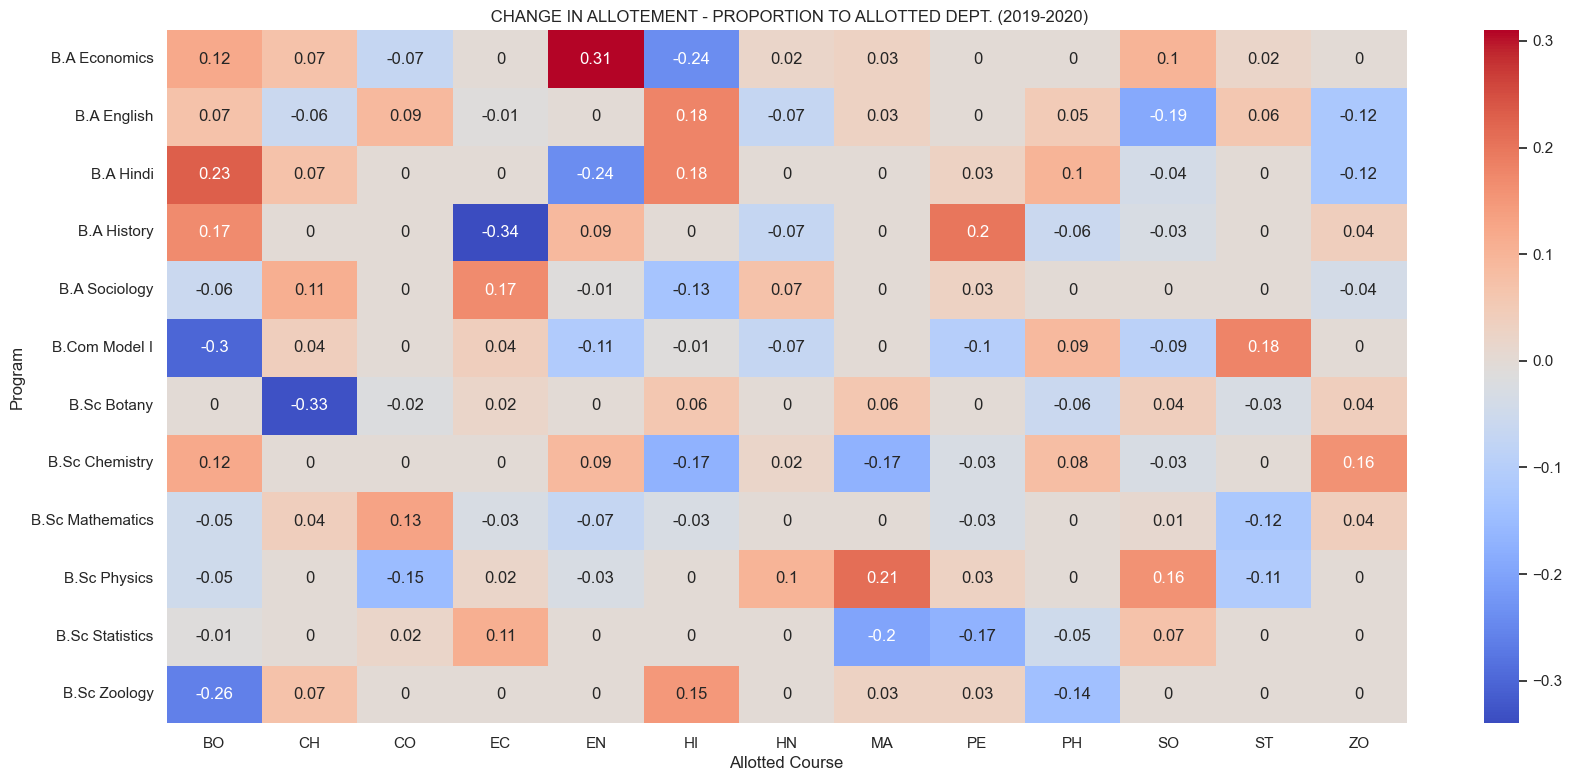

In [345]:
allot_diffc = allot20_countc - allot19_countc
#Heatmap of Allotted Courses from 2019 to 2020
plt.figure(figsize=(20,9))
plt.title(" CHANGE IN ALLOTEMENT - PROPORTION TO ALLOTTED DEPT. (2019-2020)")
sns.heatmap(allot_diffc,annot = True,cmap="coolwarm")
plt.savefig("Charts/Heatmaps/Target-Allot-Change-Heatmap.png")

#### 5.2 HEATMAP OF CHOICES

In [346]:
dict = {"B.A Economics": "EC",
     "B.A English": "EN",
     "B.A Hindi": "HN",
     "B.A History": "HI",
     "B.A Sociology": "SO",
     "B.Com Model I": "CO",
     "B.Sc Botany": "BO",
     "B.Sc Chemistry": "CH",
     "B.Sc Mathematics": "MA",
     "B.Sc Physics": "PH",
     "B.Sc Statistics": "ST",
     "B.Sc Zoology": "ZO"}

##### 5.2.1 HEATMAP OF FIRST CHOICE

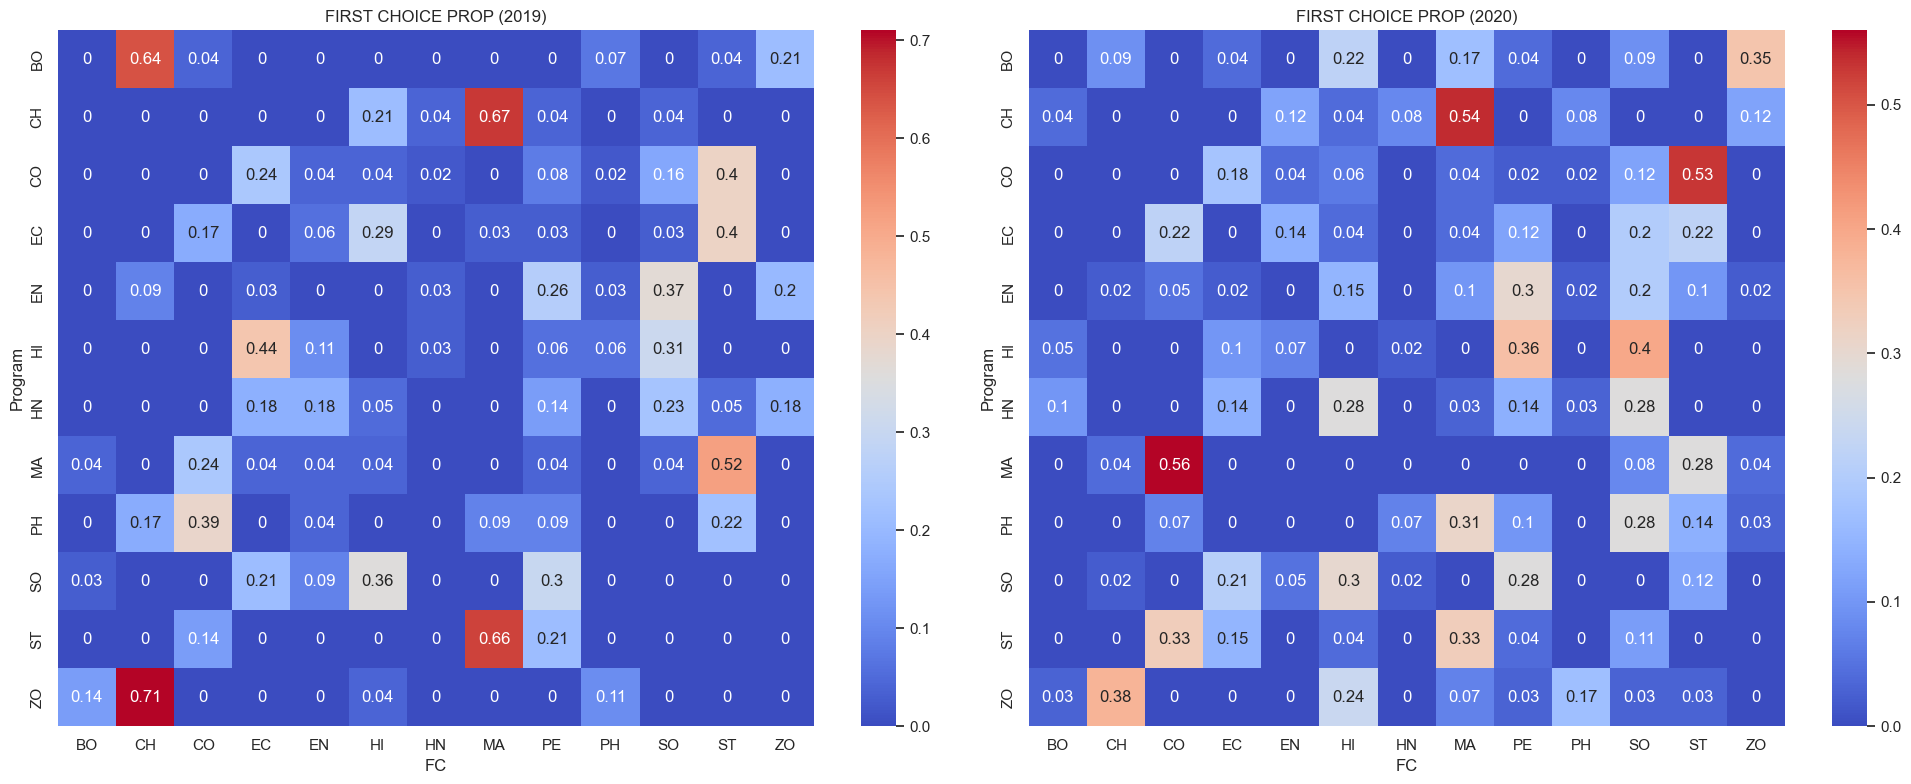

In [347]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))


#2019
# Find and replace cell values with 0 when row name matches column name
fc_dept19 = pd.crosstab(df1["Program"],df1["FC"])
 
fc_dept19 = fc_dept19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Rename the index
fc_dept19 = fc_dept19.rename(index=dict)

# Sort the columns alphabetically
fc_dept19 = fc_dept19.reindex(sorted(fc_dept19.columns), axis=1)

# Sort the index using the same order
fc_dept19 = fc_dept19.reindex(sorted(fc_dept19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fc_dept19.iterrows():
    for col in fc_dept19.columns:
        if index == col:
            fc_dept19.loc[index, col] = 0

# Create a heatmap
axes[0].set_title("FIRST CHOICE PROP (2019)")
sns.heatmap(fc_dept19,
            annot=True,
            cmap="coolwarm",
            ax = axes[0])

#2020
fc_dept20 = pd.crosstab(df2['Program'],df2['FC'])

fc_dept20 = fc_dept20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)
    
fc_dept20 = fc_dept20.rename(index = dict)

# Sort the columns alphabetically
fc_dept20 = fc_dept20.reindex(sorted(fc_dept20.columns), axis=1)

# Sort the index using the same order
fc_dept20= fc_dept20.reindex(sorted(fc_dept20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fc_dept20.iterrows():
    for col in fc_dept20.columns:
        if index == col:
            fc_dept20.loc[index, col] = 0

#heaatmap
axes[1].set_title("FIRST CHOICE PROP (2020)")
sns.heatmap(fc_dept20,
            annot = True,
            cmap="coolwarm",
            ax = axes[1])
plt.tight_layout()
plt.savefig("Charts/Heatmaps/FC-Heatmap.png")
plt.show()

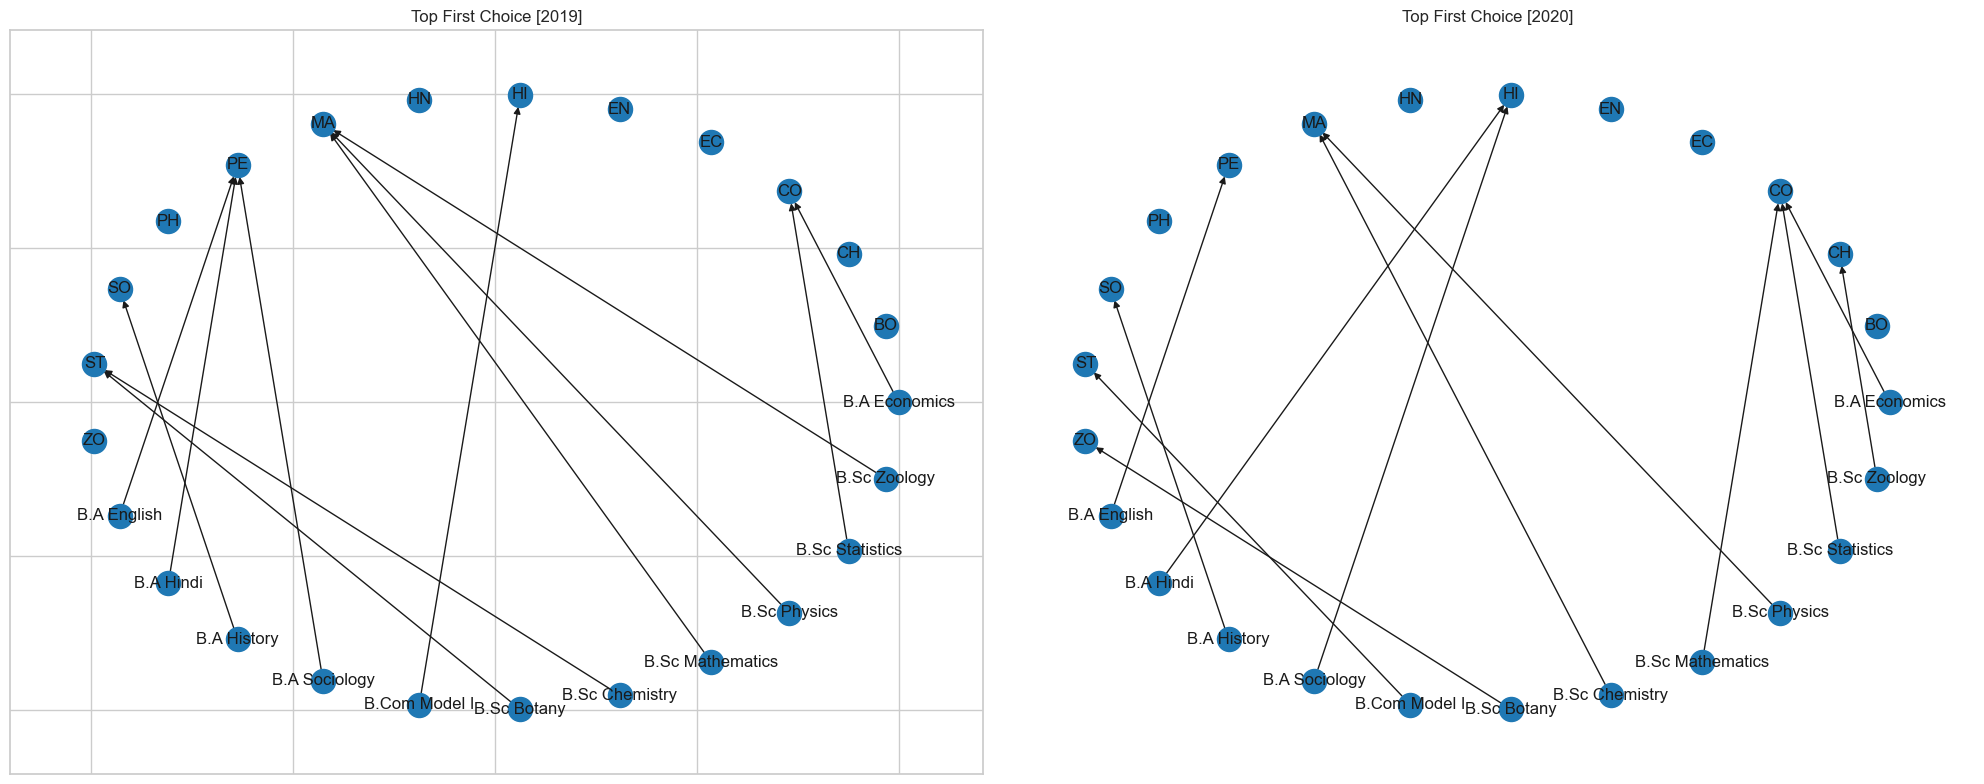

In [348]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# calculate the course with the highest number of choices for each parent department
fc_count_19 = pd.crosstab(df1["Program"],df2["FC"])
fc_max19 = fc_count_19.idxmax(axis=1)

# create the directed network graph
G = nx.DiGraph()
for programme in fc_count_19.index:
    G.add_node(programme)
    for course in fc_count_19.columns:
        G.add_node(course)

for programme, course in fc_max19.items():
    G.add_edge(programme, course)

# visualize the graph
pos = nx.circular_layout(G) # use circular layout
nx.draw_networkx(G, pos=pos,
                 with_labels=True,
                 font_size=12,
                 ax = axes[0])

plt.axis('off') # turn off axis labels
axes[0].set_title("Top First Choice [2019]")

fc_count_20 = pd.crosstab(df2["Program"],df2["FC"])
fc_max20 = fc_count_20.idxmax(axis=1)

# create the directed network graph
G = nx.DiGraph()
for programme in fc_count_20.index:
    G.add_node(programme)
    for course in fc_count_20.columns:
        G.add_node(course)

for programme, course in fc_max20.items():
    G.add_edge(programme, course)

# visualize the graph
pos = nx.circular_layout(G) # use circular layout
nx.draw_networkx(G, pos=pos,
                 with_labels=True,
                 font_size=12,
                 ax = axes[1])
plt.axis('off') # turn off axis labels
axes[1].set_title("Top First Choice [2020]")


plt.tight_layout()
plt.savefig("Charts/Network-plots/TOP-FC-NTQ.png")
plt.show()


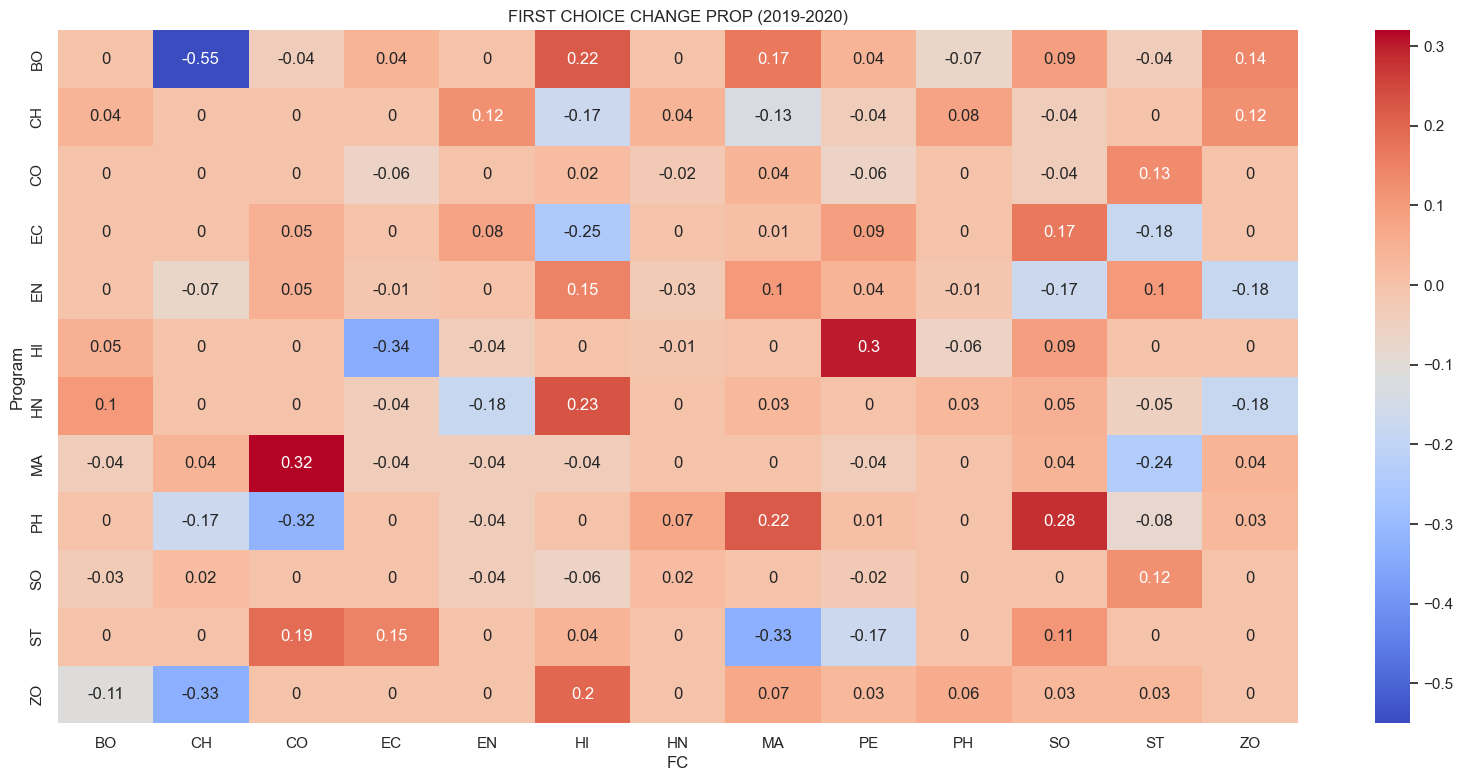

In [349]:
fc_diff = (fc_dept20 - fc_dept19)
plt.figure(figsize=(20,9))
plt.title("FIRST CHOICE CHANGE PROP (2019-2020)")
sns.heatmap(fc_diff,annot = True,cmap="coolwarm")
plt.savefig("Charts/Heatmaps/FC-Change-Prop_Heatmap.png")

##### 5.2.2 HEATMAP OF SECOND CHOICE

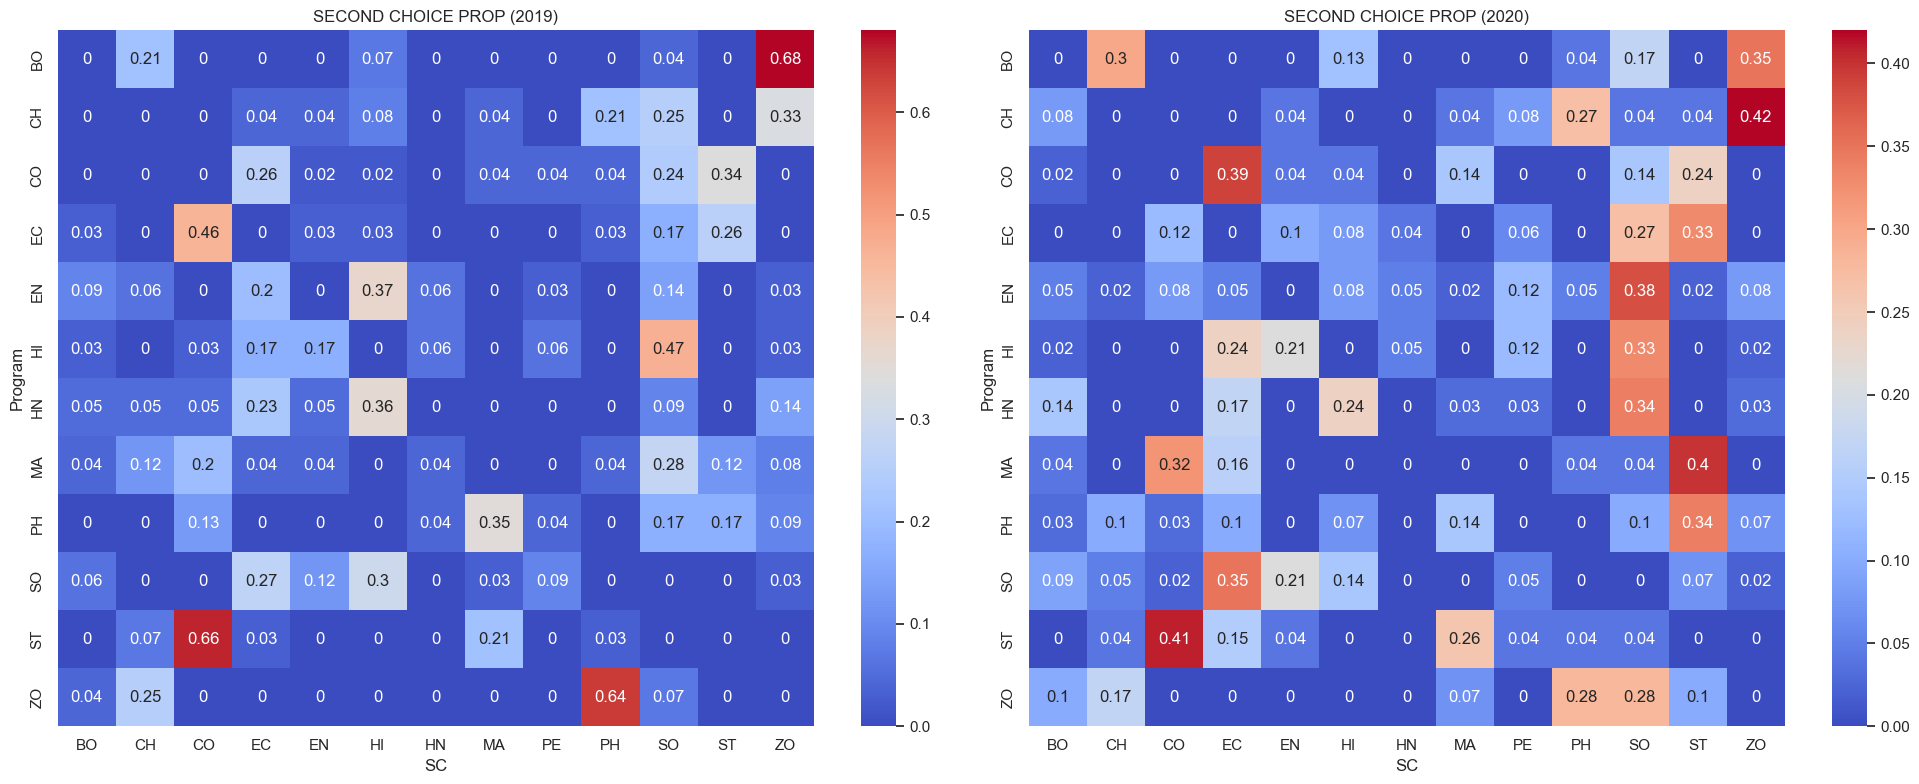

In [350]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))


#2019
# Find and replace cell values with 0 when row name matches column name
sc_dept19 = pd.crosstab(df1["Program"],df1["SC"])
 
sc_dept19 = sc_dept19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Rename the index
sc_dept19 = sc_dept19.rename(index=dict)

# Sort the columns alphabetically
sc_dept19 = sc_dept19.reindex(sorted(sc_dept19.columns), axis=1)

# Sort the index using the same order
sc_dept19 = sc_dept19.reindex(sorted(sc_dept19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sc_dept19.iterrows():
    for col in sc_dept19.columns:
        if index == col:
            sc_dept19.loc[index, col] = 0

# Create a heatmap
axes[0].set_title("SECOND CHOICE PROP (2019)")
sns.heatmap(sc_dept19,
            annot=True,
            cmap="coolwarm",
            ax = axes[0])

#2020
sc_dept20 = pd.crosstab(df2['Program'],df2['SC'])

sc_dept20 = sc_dept20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)
    
sc_dept20 = sc_dept20.rename(index = dict)

# Sort the columns alphabetically
sc_dept20 = sc_dept20.reindex(sorted(sc_dept20.columns), axis=1)

# Sort the index using the same order
sc_dept20= sc_dept20.reindex(sorted(sc_dept20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sc_dept20.iterrows():
    for col in sc_dept20.columns:
        if index == col:
            sc_dept20.loc[index, col] = 0

#heaatmap
axes[1].set_title("SECOND CHOICE PROP (2020)")
sns.heatmap(sc_dept20,
            annot = True,
            cmap="coolwarm",
            ax = axes[1])
plt.tight_layout()
plt.savefig("Charts/Heatmaps/SC-Heatmap.png")
plt.show()

##### 5.2.3 HEATMAP OF THIRD CHOICE

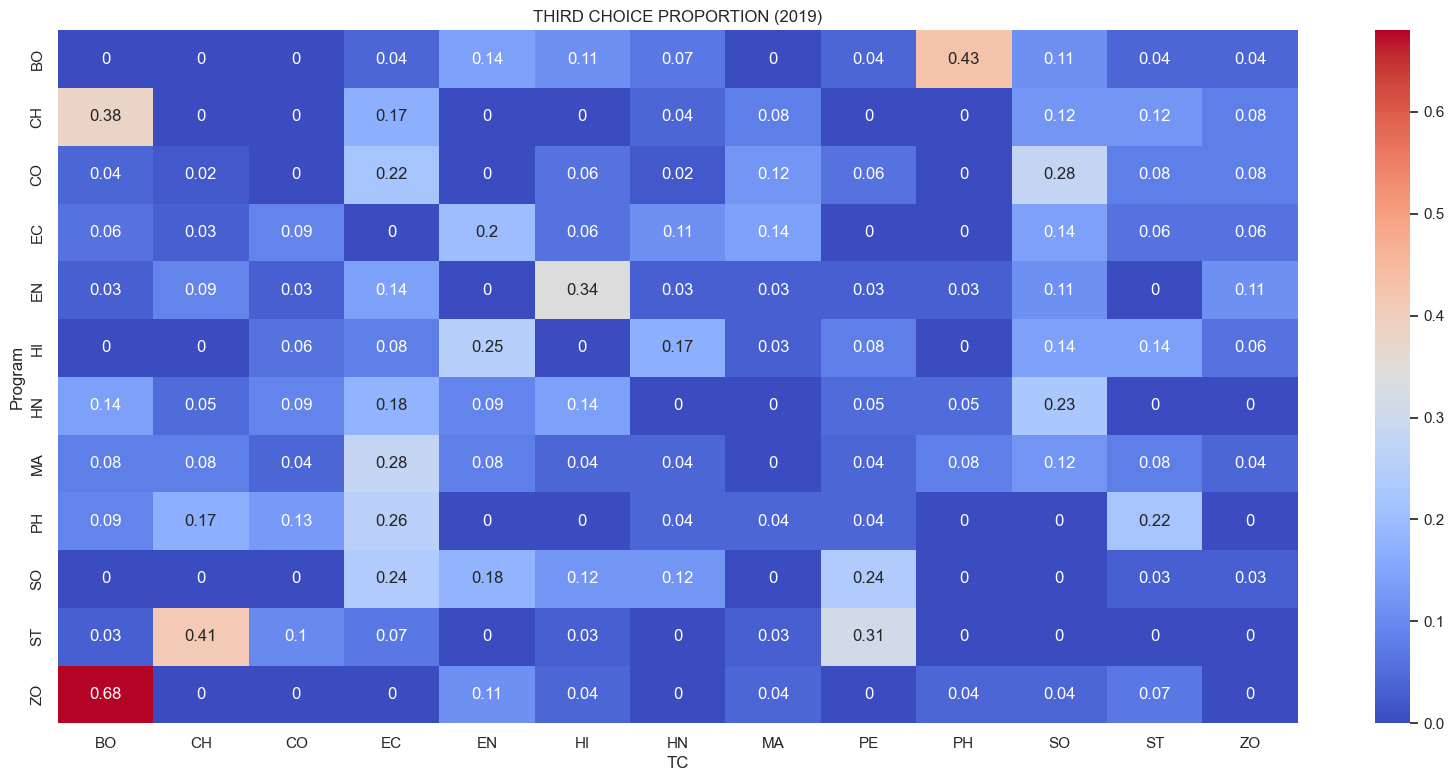

In [351]:
tc_dept19 = pd.crosstab(df1['Program'],df1['TC'])

tc_dept19 = tc_dept19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Rename the index
tc_dept19 = tc_dept19.rename(index=dict)

# Sort the columns alphabetically
tc_dept19 = tc_dept19.reindex(sorted(tc_dept19.columns), axis=1)

# Sort the index using the same order
tc_dept19 = tc_dept19.reindex(sorted(tc_dept19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in tc_dept19.iterrows():
    for col in tc_dept19.columns:
        if index == col:
            tc_dept19.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("THIRD CHOICE PROPORTION (2019)")
sns.heatmap(tc_dept19,annot = True,cmap="coolwarm")
plt.show()

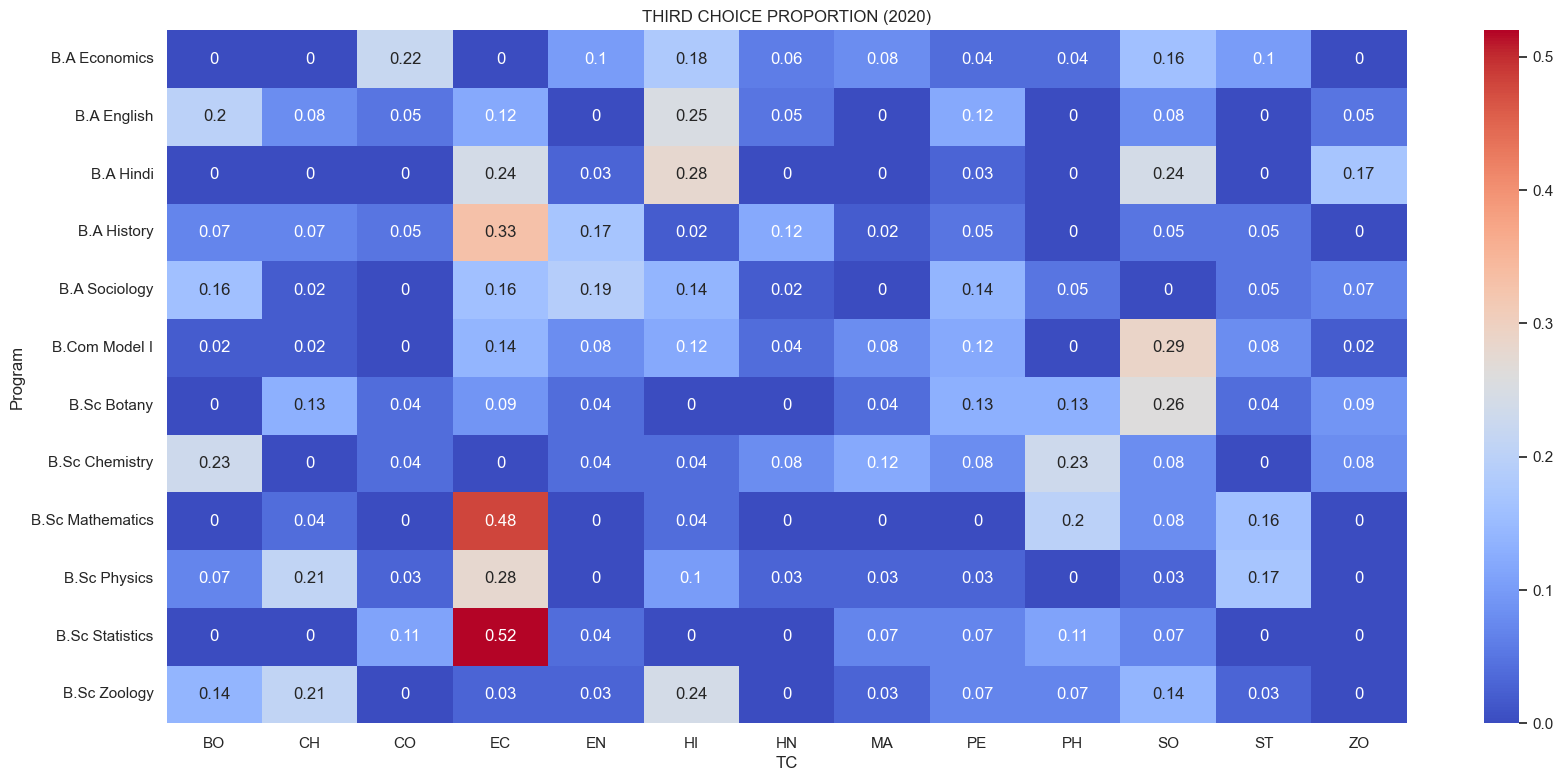

In [352]:
tc_dept20 = pd.crosstab(df2['Program'],df2['TC'])

tc_dept20 = tc_dept20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Rename the index
tc_dept2 = tc_dept19.rename(index=dict)

# Sort the columns alphabetically
tc_dept20 = tc_dept20.reindex(sorted(tc_dept20.columns), axis=1)

# Sort the index using the same order
tc_dept20 = tc_dept20.reindex(sorted(tc_dept20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in tc_dept20.iterrows():
    for col in tc_dept20.columns:
        if index == col:
            tc_dept20.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("THIRD CHOICE PROPORTION (2020)")
sns.heatmap(tc_dept20,annot = True,cmap="coolwarm")
plt.show()

##### 5.2.4 HEATMAP OF FOURTH CHOICE

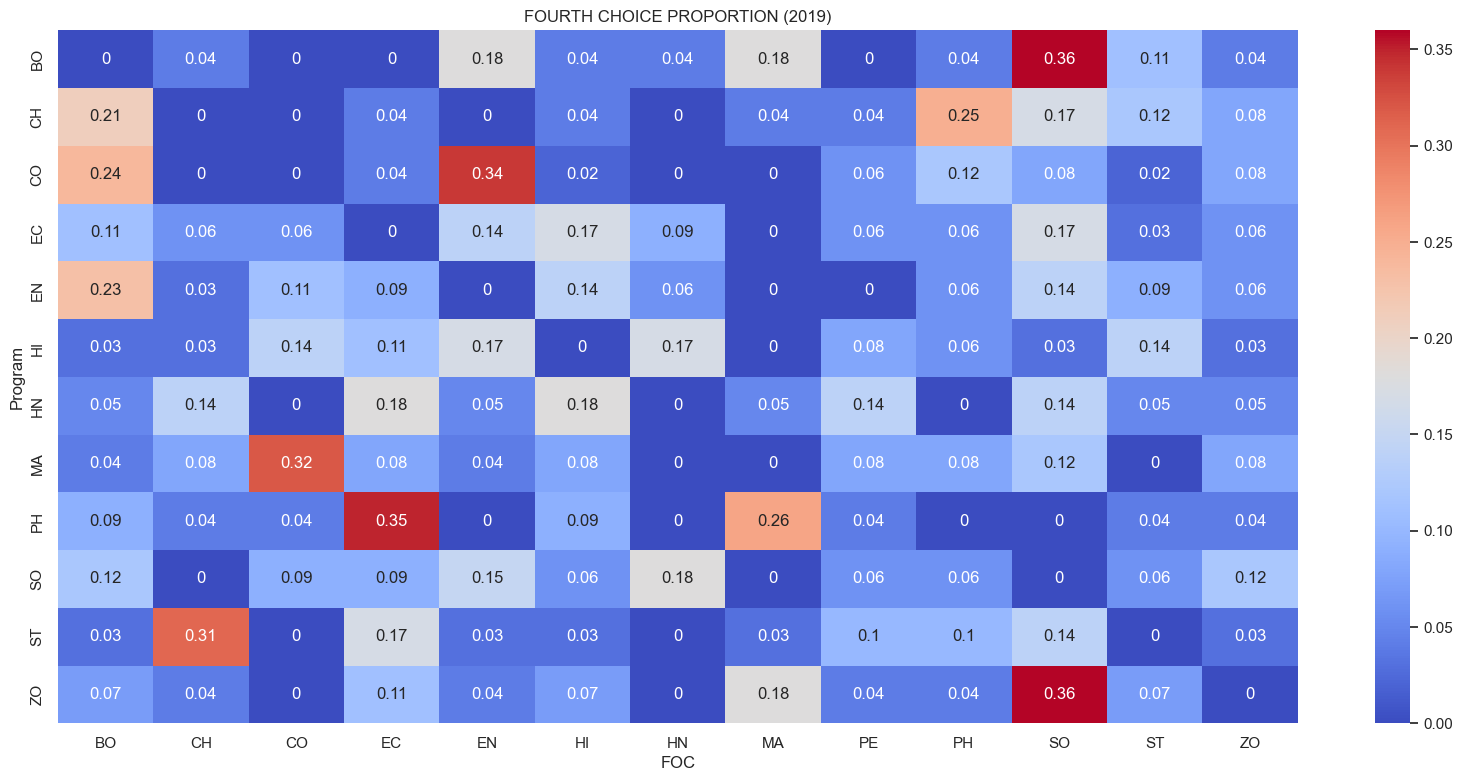

In [353]:
foc_dept19 = pd.crosstab(df1['Program'],df1['FOC'])

foc_dept19 = foc_dept19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

foc_dept19 = foc_dept19.rename(index=dict)

# Sort the columns alphabetically
foc_dept19 = foc_dept19.reindex(sorted(foc_dept19.columns), axis=1)

# Sort the index using the same order
foc_dept19 = foc_dept19.reindex(sorted(foc_dept19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in foc_dept19.iterrows():
    for col in foc_dept19.columns:
        if index == col:
            foc_dept19.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("FOURTH CHOICE PROPORTION (2019)")
sns.heatmap(foc_dept19,annot = True,cmap="coolwarm")
plt.show()

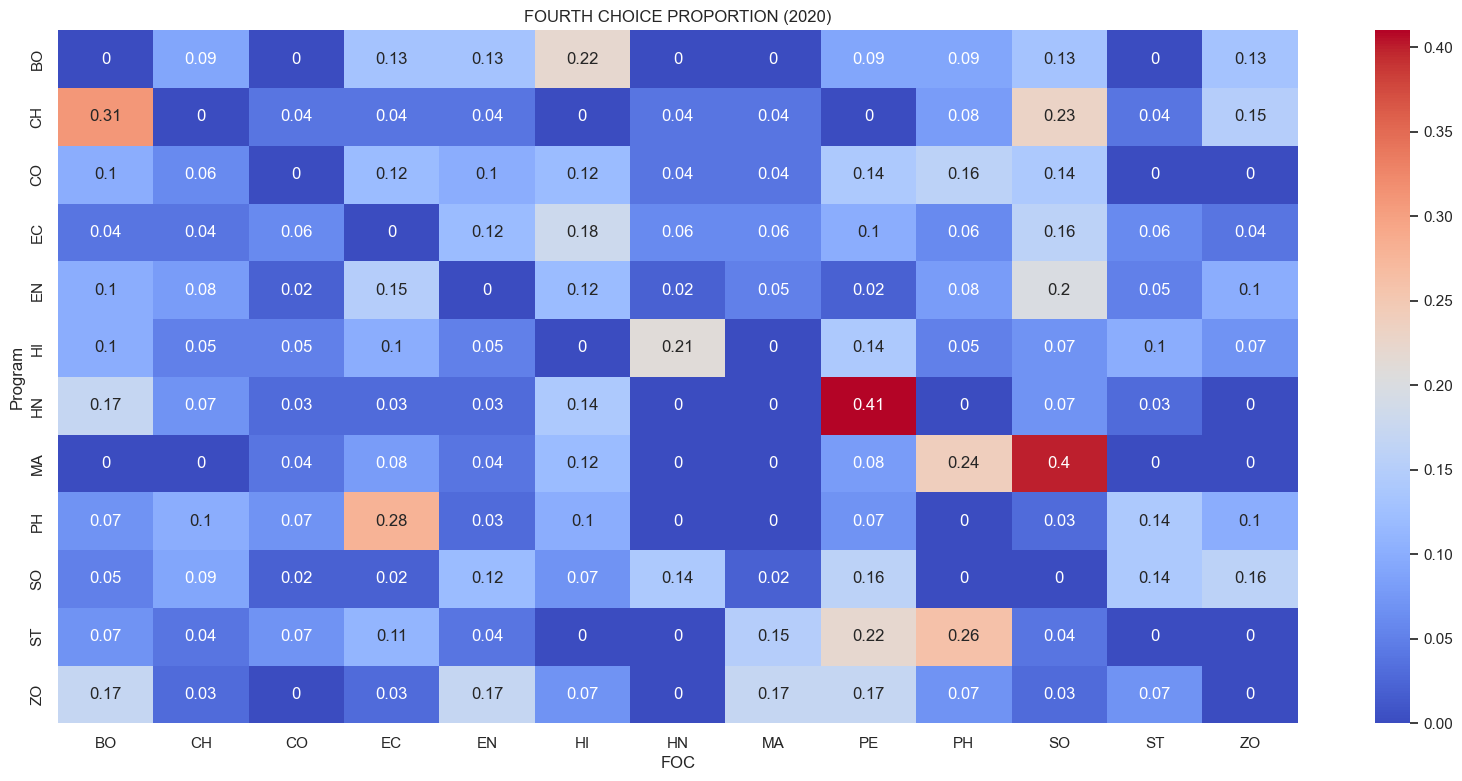

In [354]:
foc_dept20 = pd.crosstab(df2['Program'],df2['FOC'])

foc_dept20 = foc_dept20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Rename the index
foc_dept20 = foc_dept20.rename(index=dict)

# Sort the columns alphabetically
foc_dept20 = foc_dept20.reindex(sorted(foc_dept20.columns), axis=1)

# Sort the index using the same order
foc_dept20 = foc_dept20.reindex(sorted(foc_dept20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in foc_dept20.iterrows():
    for col in foc_dept20.columns:
        if index == col:
            foc_dept20.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("FOURTH CHOICE PROPORTION (2020)")
sns.heatmap(foc_dept20,annot = True,cmap="coolwarm")
plt.show()

##### 5.2.5 HEATMAP OF FIFTH CHOICE

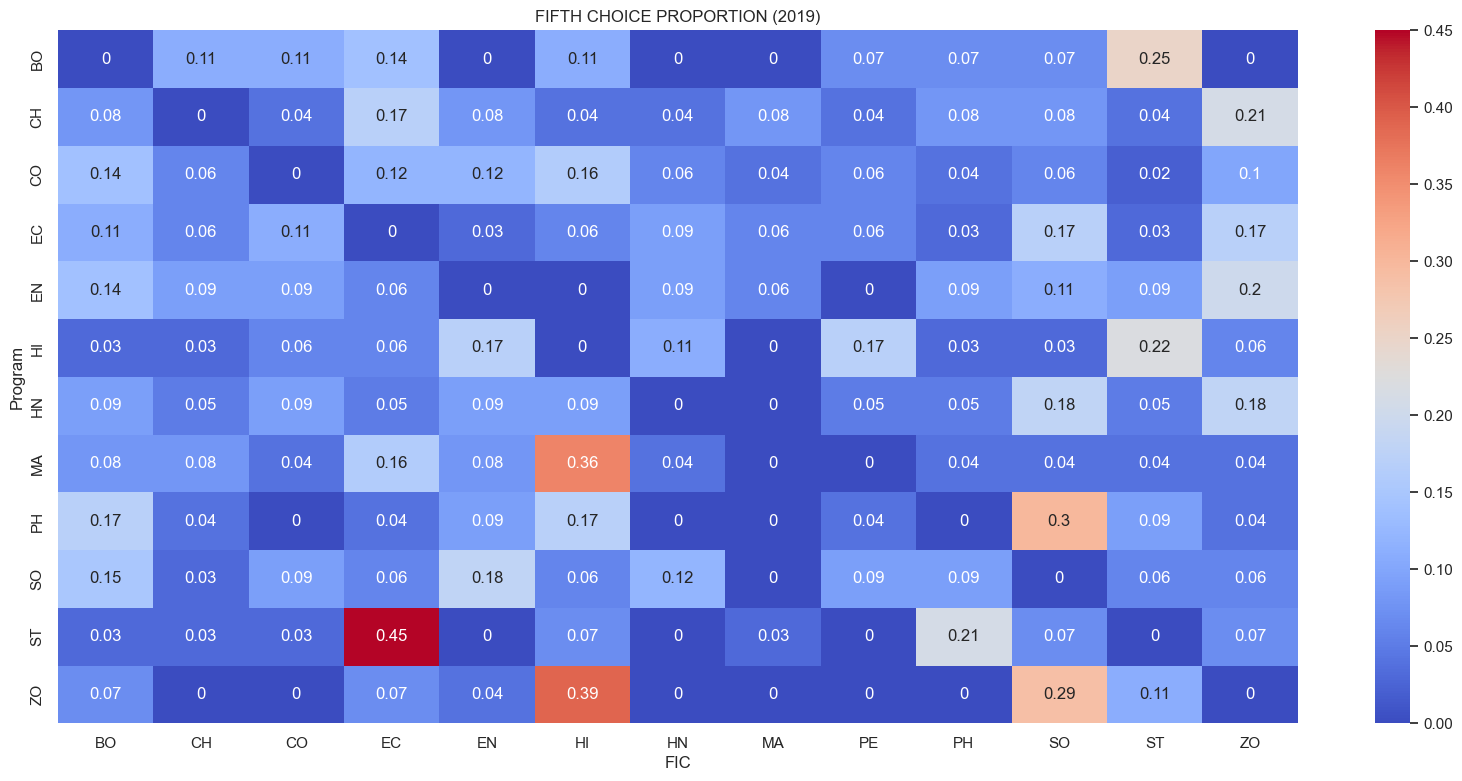

In [355]:
fic_dept19 = pd.crosstab(df1['Program'],df1['FIC'])

fic_dept19 = fic_dept19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

# Rename the index
fic_dept19 = fic_dept19.rename(index=dict)

# Sort the columns alphabetically
fic_dept19 = fic_dept19.reindex(sorted(fic_dept19.columns), axis=1)

# Sort the index using the same order
fic_dept19 = fic_dept19.reindex(sorted(fic_dept19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fic_dept19.iterrows():
    for col in fic_dept19.columns:
        if index == col:
            fic_dept19.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("FIFTH CHOICE PROPORTION (2019)")
sns.heatmap(fic_dept19,annot = True,cmap="coolwarm")
plt.show()

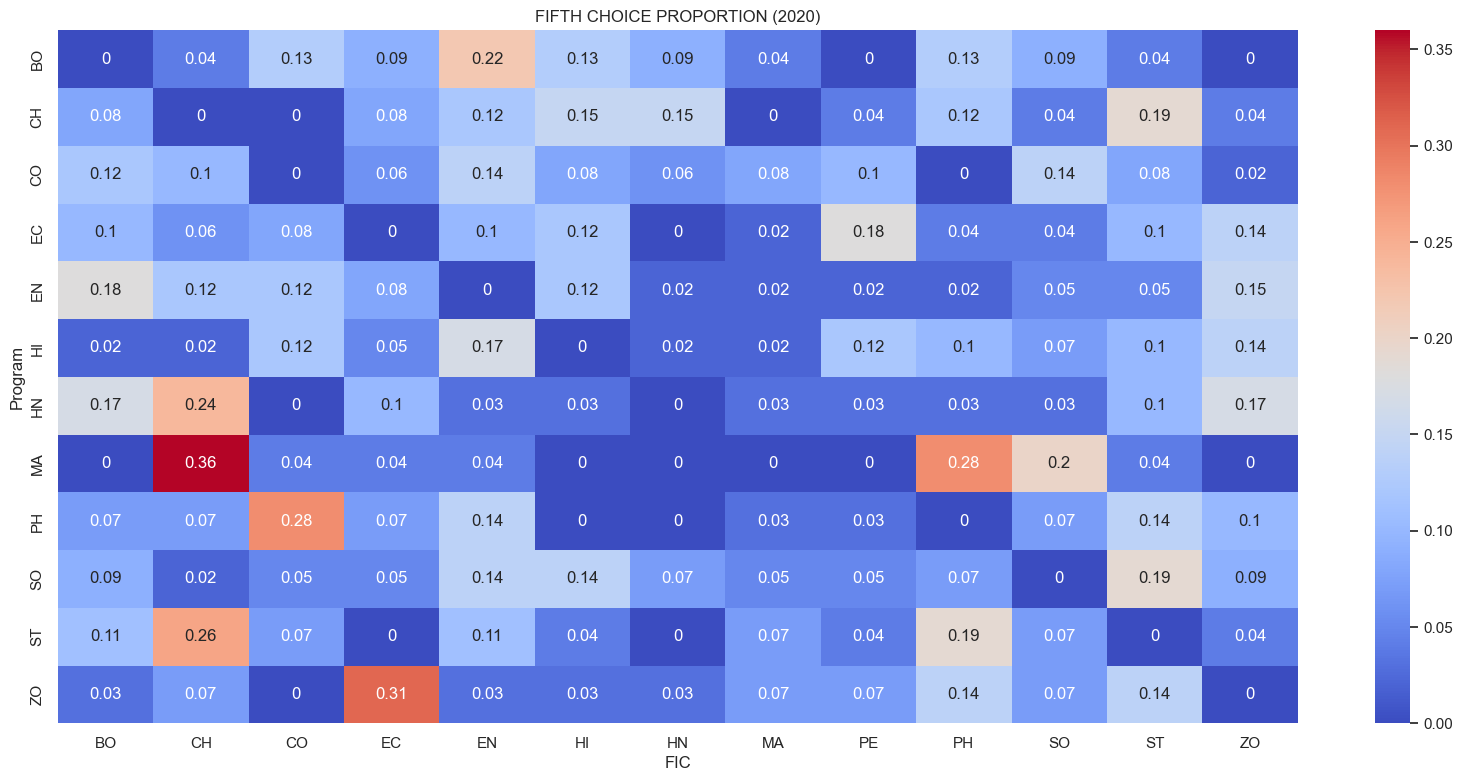

In [356]:
fic_dept20 = pd.crosstab(df2['Program'],df2['FIC'])

fic_dept20 = fic_dept20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

fic_dept20 = fic_dept20.rename(index=dict)

# Sort the columns alphabetically
fic_dept20 = fic_dept20.reindex(sorted(fic_dept20.columns), axis=1)

# Sort the index using the same order
fic_dept20 = fic_dept20.reindex(sorted(fic_dept20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fic_dept20.iterrows():
    for col in fic_dept20.columns:
        if index == col:
            fic_dept20.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("FIFTH CHOICE PROPORTION (2020)")
sns.heatmap(fic_dept20,annot = True,cmap="coolwarm")
plt.show()

##### 5.2.6 HEATMAP OF SIXTH CHOICE

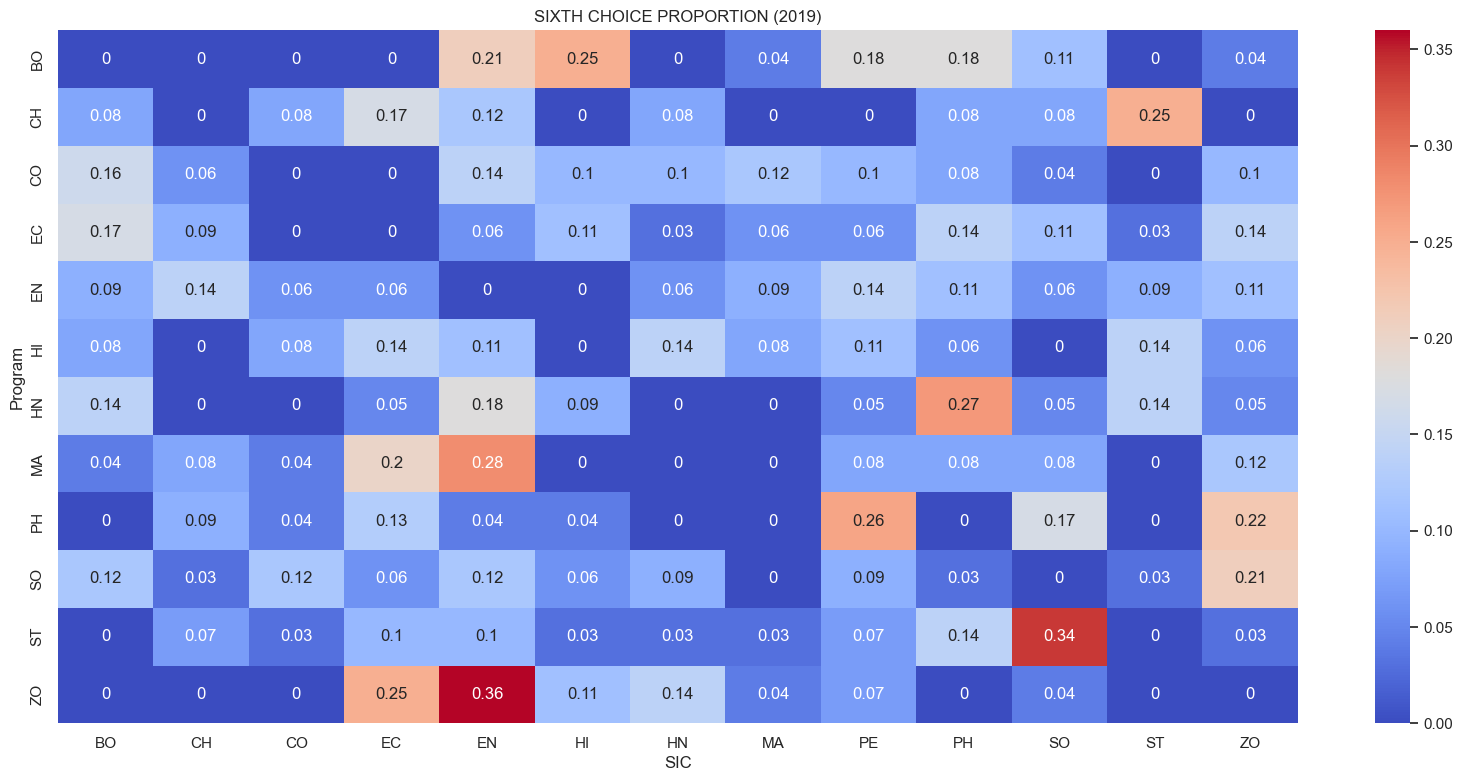

In [357]:
sic_dept19 = pd.crosstab(df1['Program'],df1['SIC'])

sic_dept19 = sic_dept19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

sic_dept19 = sic_dept19.rename(index=dict)

# Sort the columns alphabetically
sic_dept19 = sic_dept19.reindex(sorted(sic_dept19.columns), axis=1)

# Sort the index using the same order
sic_dept19 = sic_dept19.reindex(sorted(sic_dept19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sic_dept19.iterrows():
    for col in sic_dept19.columns:
        if index == col:
            sic_dept19.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("SIXTH CHOICE PROPORTION (2019)")
sns.heatmap(sic_dept19,annot = True,cmap="coolwarm")
plt.show()

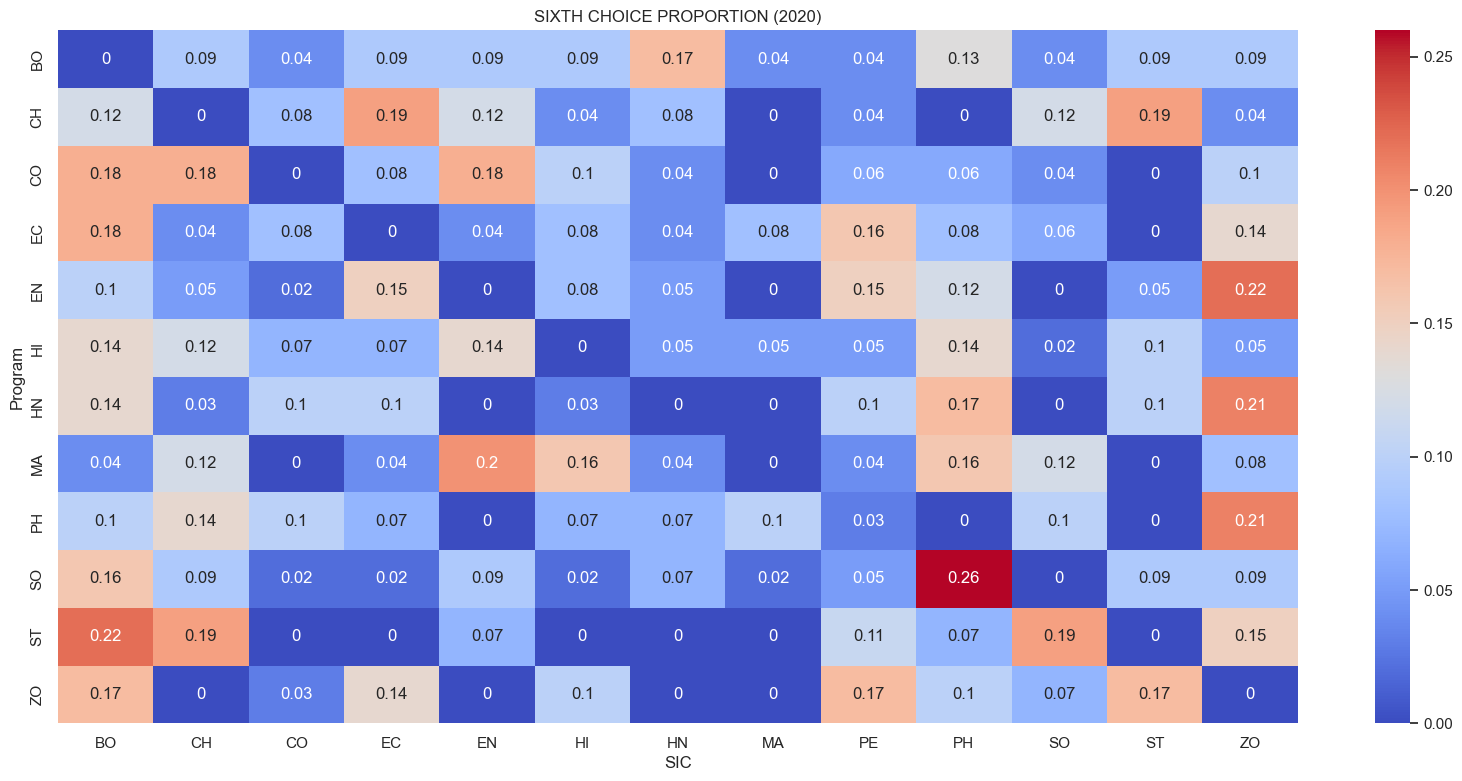

In [358]:
sic_dept20 = pd.crosstab(df2['Program'],df2['SIC'])

sic_dept20 = sic_dept20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

sic_dept20 = sic_dept20.rename(index=dict)

# Sort the columns alphabetically
sic_dept20 = sic_dept20.reindex(sorted(sic_dept20.columns), axis=1)

# Sort the index using the same order
sic_dept20 = sic_dept20.reindex(sorted(sic_dept20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sic_dept20.iterrows():
    for col in sic_dept20.columns:
        if index == col:
            sic_dept20.loc[index, col] = 0

plt.figure(figsize=(20,9))
plt.title("SIXTH CHOICE PROPORTION (2020)")
sns.heatmap(sic_dept20,annot = True,cmap="coolwarm")
plt.show()

#### 5.3 TOTAL CHOICES TO DEPARTMENTS

1. Taking individual counts of choices from first to sixth.
2. Sorting the index & columns alphabetically (for smooth corresponding summation of choices)
3. Replacing values with zero; Where the parent and the target department are the same.

In [359]:
fc_count_19 = fc_count_19.rename(index=dict)

# Sort the columns alphabetically
fc_count_19 = fc_count_19.reindex(sorted(fc_count_19.columns), axis=1)

# Sort the index using the same order
fc_count_19 = fc_count_19.reindex(sorted(fc_count_19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fc_count_19.iterrows():
    for col in fc_count_19.columns:
        if index == col:
            fc_count_19.loc[index, col] = 0


fc_count_20 = pd.crosstab(df2['Program'],df2['FC'])
fc_count_20 = fc_count_20.rename(index=dict)

# Sort the columns alphabetically
fc_count_20 = fc_count_20.reindex(sorted(fc_count_20.columns), axis=1)

# Sort the index using the same order
fc_count_20 = fc_count_20.reindex(sorted(fc_count_20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fc_count_20.iterrows():
    for col in fc_count_20.columns:
        if index == col:
            fc_count_20.loc[index, col] = 0

In [360]:
sc_count_19 = pd.crosstab(df1["Program"],df1["SC"])
sc_count_19 = sc_count_19.rename(index=dict)

# Sort the columns alphabetically
sc_count_19 = sc_count_19.reindex(sorted(sc_count_19.columns), axis=1)

# Sort the index using the same order
sc_count_19 = sc_count_19.reindex(sorted(sc_count_19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sc_count_19.iterrows():
    for col in sc_count_19.columns:
        if index == col:
            sc_count_19.loc[index, col] = 0


sc_count_20 = pd.crosstab(df2['Program'],df2['SC'])
sc_count_20 = sc_count_20.rename(index=dict)

# Sort the columns alphabetically
sc_count_20 = sc_count_20.reindex(sorted(sc_count_20.columns), axis=1)

# Sort the index using the same order
sc_count_20 = sc_count_20.reindex(sorted(sc_count_20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sc_count_20.iterrows():
    for col in sc_count_20.columns:
        if index == col:
            sc_count_20.loc[index, col] = 0

In [361]:
tc_count_19 = pd.crosstab(df1["Program"],df1["TC"])
tc_count_19 = tc_count_19.rename(index=dict)

# Sort the columns alphabetically
tc_count_19 = tc_count_19.reindex(sorted(tc_count_19.columns), axis=1)

# Sort the index using the same order
tc_count_19 = tc_count_19.reindex(sorted(tc_count_19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in tc_count_19.iterrows():
    for col in tc_count_19.columns:
        if index == col:
            tc_count_19.loc[index, col] = 0


tc_count_20 = pd.crosstab(df2['Program'],df2['TC'])
tc_count_20 = tc_count_20.rename(index=dict)

# Sort the columns alphabetically
tc_count_20 = tc_count_20.reindex(sorted(tc_count_20.columns), axis=1)

# Sort the index using the same order
tc_count_20 = tc_count_20.reindex(sorted(tc_count_20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in tc_count_20.iterrows():
    for col in tc_count_20.columns:
        if index == col:
            tc_count_20.loc[index, col] = 0

In [362]:
foc_count_19 = pd.crosstab(df1["Program"],df1["FOC"])
foc_count_19 = foc_count_19.rename(index=dict)

# Sort the columns alphabetically
foc_count_19 = foc_count_19.reindex(sorted(foc_count_19.columns), axis=1)

# Sort the index using the same order
foc_count_19 = foc_count_19.reindex(sorted(foc_count_19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in foc_count_19.iterrows():
    for col in foc_count_19.columns:
        if index == col:
            foc_count_19.loc[index, col] = 0


foc_count_20 = pd.crosstab(df2['Program'],df2['FOC'])
foc_count_20 = foc_count_20.rename(index=dict)

# Sort the columns alphabetically
foc_count_20 = foc_count_20.reindex(sorted(foc_count_20.columns), axis=1)

# Sort the index using the same order
foc_count_20 = foc_count_20.reindex(sorted(foc_count_20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in foc_count_20.iterrows():
    for col in foc_count_20.columns:
        if index == col:
            foc_count_20.loc[index, col] = 0

In [363]:
fic_count_19 = pd.crosstab(df1["Program"],df1["FIC"])
fic_count_19 = fic_count_19.rename(index=dict)

# Sort the columns alphabetically
fic_count_19 = fic_count_19.reindex(sorted(fic_count_19.columns), axis=1)

# Sort the index using the same order
fic_count_19 = fic_count_19.reindex(sorted(fic_count_19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fic_count_19.iterrows():
    for col in fic_count_19.columns:
        if index == col:
            fic_count_19.loc[index, col] = 0


fic_count_20 = pd.crosstab(df2['Program'],df2['FIC'])
fic_count_20 = fic_count_20.rename(index=dict)

# Sort the columns alphabetically
fic_count_20 = fic_count_20.reindex(sorted(fic_count_20.columns), axis=1)

# Sort the index using the same order
fic_count_20 = fic_count_20.reindex(sorted(fic_count_20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in fic_count_20.iterrows():
    for col in fic_count_20.columns:
        if index == col:
            fic_count_20.loc[index, col] = 0

In [364]:
sic_count_19 = pd.crosstab(df1["Program"],df1["SIC"])
sic_count_19 = sic_count_19.rename(index=dict)

# Sort the columns alphabetically
sic_count_19 = sic_count_19.reindex(sorted(sic_count_19.columns), axis=1)

# Sort the index using the same order
sic_count_19 = sic_count_19.reindex(sorted(sic_count_19.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sic_count_19.iterrows():
    for col in sic_count_19.columns:
        if index == col:
            sic_count_19.loc[index, col] = 0


sic_count_20 = pd.crosstab(df2['Program'],df2['SIC'])
sic_count_20 = sic_count_20.rename(index=dict)

# Sort the columns alphabetically
sic_count_20 = sic_count_20.reindex(sorted(sic_count_20.columns), axis=1)

# Sort the index using the same order
sic_count_20 = sic_count_20.reindex(sorted(sic_count_20.index, key=lambda x: list(map(str, x))), axis=0)

# Find and replace cell values with 0 when row name matches column name
for index, row in sic_count_20.iterrows():
    for col in sic_count_20.columns:
        if index == col:
            sic_count_20.loc[index, col] = 0

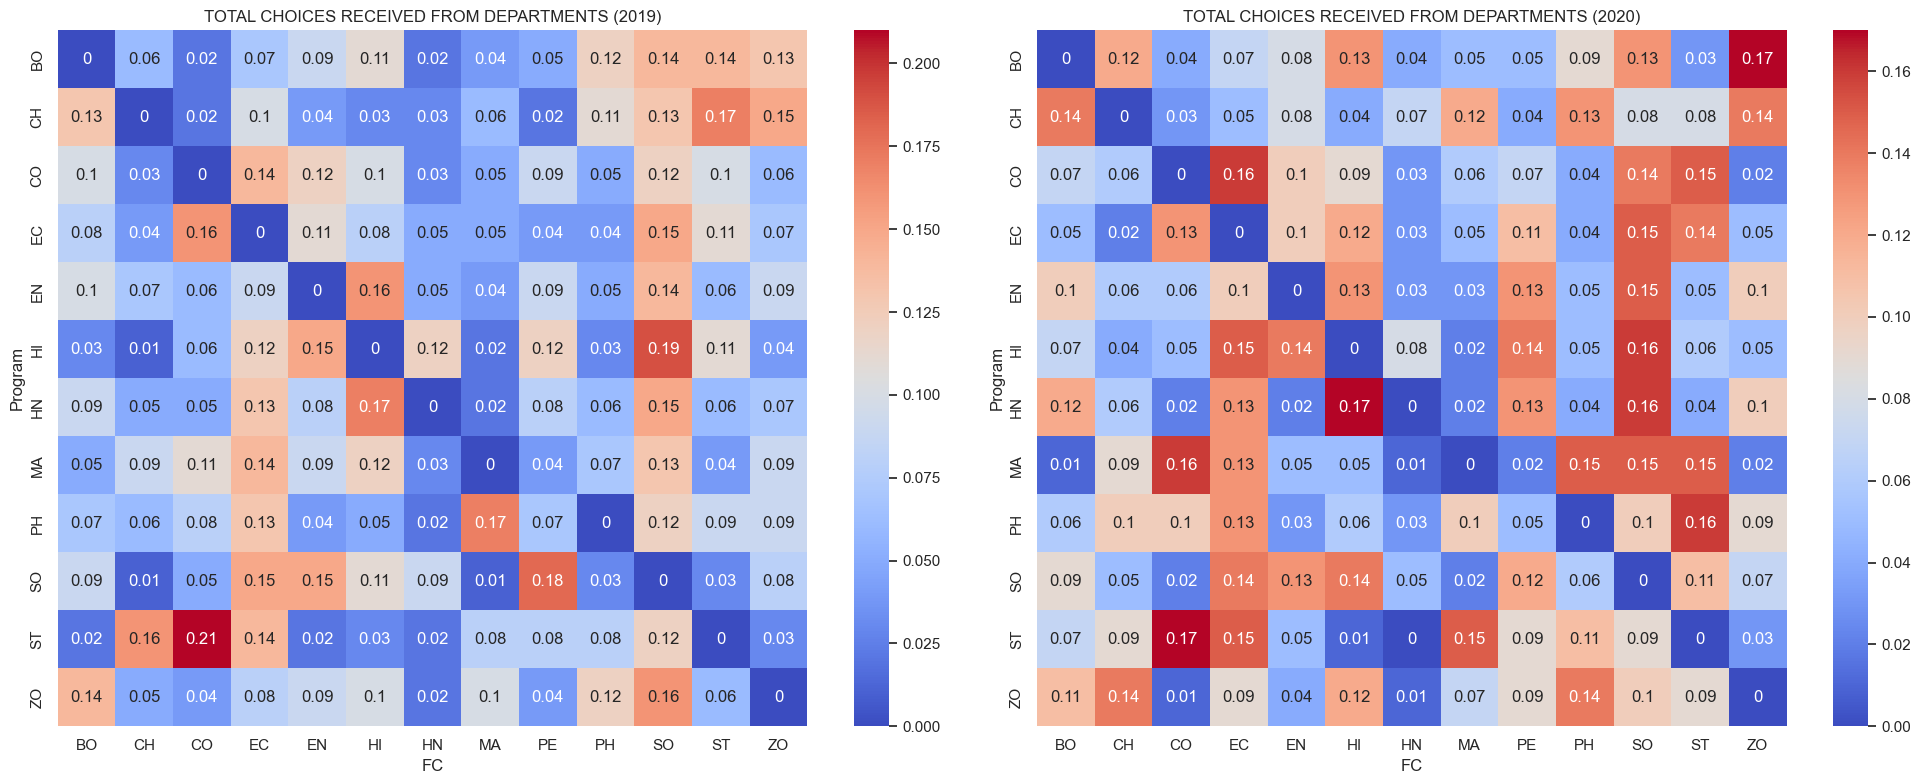

In [365]:
tot_ch19 = ((fc_count_19 + sc_count_19 + tc_count_19 + foc_count_19 + fic_count_19 + sic_count_19))#/(row_19*6))*10
tot_ch19 = tot_ch19.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

tot_ch20 = (fc_count_20 + sc_count_20 + tc_count_20 + foc_count_20 + fic_count_20 + sic_count_20)#/(row_20*6)
tot_ch20 = tot_ch20.apply(lambda row: row / row.sum(), axis=1).astype(float).round(2)

fig,axes = plt.subplots(1,2, figsize=(20,8))

axes[0].set_title("TOTAL CHOICES RECEIVED FROM DEPARTMENTS (2019)")
plt.xlabel("CHOICES RECEIVED")
sns.heatmap(tot_ch19,
            annot=True,
            cmap="coolwarm",
            ax = axes[0])

axes[1].set_title("TOTAL CHOICES RECEIVED FROM DEPARTMENTS (2020)")
plt.xlabel("CHOICES RECEIVED")
sns.heatmap(tot_ch20,
            annot=True,
            cmap="coolwarm",
            ax = axes[1])
plt.tight_layout()
plt.savefig("Charts/Heatmaps/Tot-choices-Heatmap.png")
plt.show()

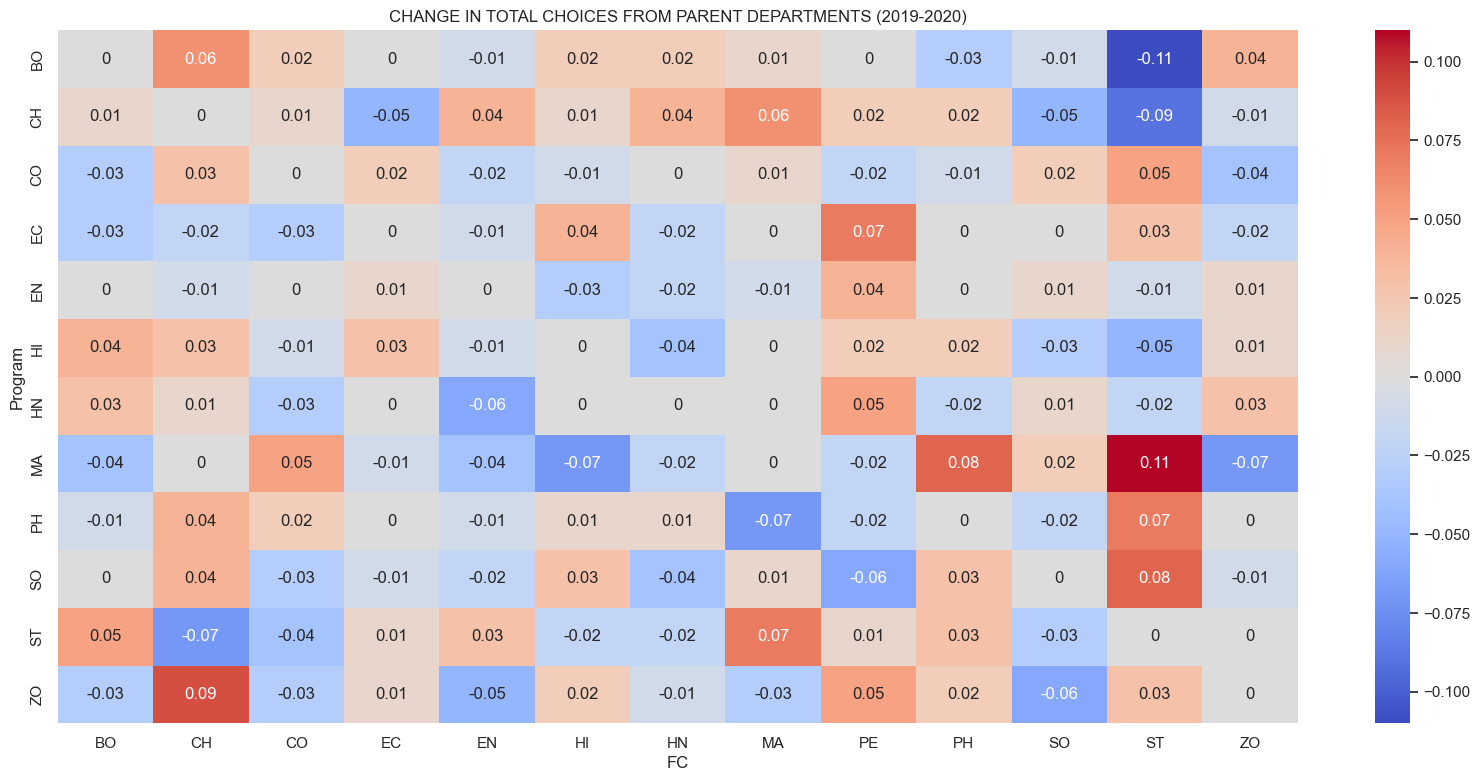

In [366]:
tot_ch_diff = tot_ch20 - tot_ch19
#Difference in total choices of Departments
plt.figure(figsize=(20,9))
plt.title("CHANGE IN TOTAL CHOICES FROM PARENT DEPARTMENTS (2019-2020)")
plt.xlabel("CHOICES RECEIVED")
sns.heatmap(tot_ch_diff,annot=True,cmap="coolwarm")
plt.savefig("Charts/Heatmaps/Tot-choice-change-Heatmap.png")

## MACHINE LEARNING 

### K-Means

In [367]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [368]:
print(os.environ["OMP_NUM_THREADS"])

1


In [369]:
# importing neccessary libraries for clustering and visualizations
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from scipy.spatial import QhullError
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

#### Allotment Clusters from Parent Departments

##### CLUSTER FROM PARENT DEPARTMENT-2019 - ROW WISE

d:\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


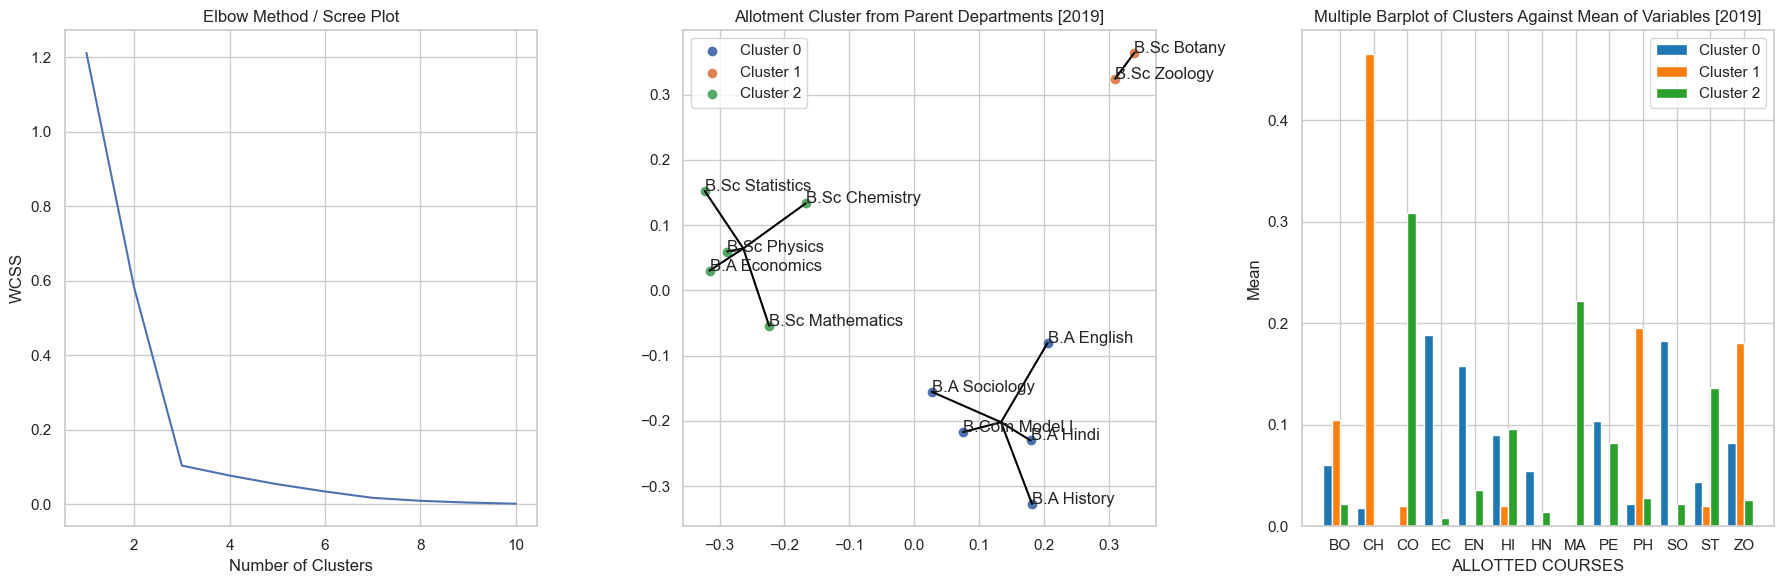

In [370]:
# Allotment 2019
df = allot19_countr.copy()

# Convert dataframe to numpy array
X = df.values

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determining the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Create a single figure with 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scree Plot
axes[0].plot(range(1, 11), wcss)
axes[0].set_title('Elbow Method / Scree Plot')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('WCSS')

# Subplot 2: Cluster Plot
n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
axes[1].set_title('Allotment Cluster from Parent Departments [2019]')
for i in range(n_clusters):
    mask = kmeans.labels_ == i
    cluster_points = X_pca[mask]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    for point in cluster_points:
        axes[1].plot([point[0], kmeans.cluster_centers_[i][0]], [point[1], kmeans.cluster_centers_[i][1]], c='black')
    index_names = df.index[mask]
    for j, point in enumerate(cluster_points):
        axes[1].annotate(index_names[j], (point[0], point[1]))
axes[1].legend()

# Subplot 3: Multiple Barplot
labels = kmeans.labels_
cluster_means = df.groupby(labels).mean()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
n_clusters = len(cluster_means.index)
n_variables = len(cluster_means.columns)
width = 1 / (n_clusters + 1)
for i in range(n_clusters):
    x = np.arange(n_variables) + i * width
    axes[2].bar(x, cluster_means.iloc[i], width=width, label=f'Cluster {i}', color=colors[i])
axes[2].set_xticks(np.arange(n_variables) + width * n_clusters / 2)
axes[2].set_xticklabels(cluster_means.columns)
axes[2].legend()
axes[2].set_xlabel('ALLOTTED COURSES')
axes[2].set_ylabel('Mean')
axes[2].set_title('Multiple Barplot of Clusters Against Mean of Variables [2019]')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("Charts/Cluster-plots/par-cluster-allot-19.png")

# Show the layout
plt.show()


d:\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


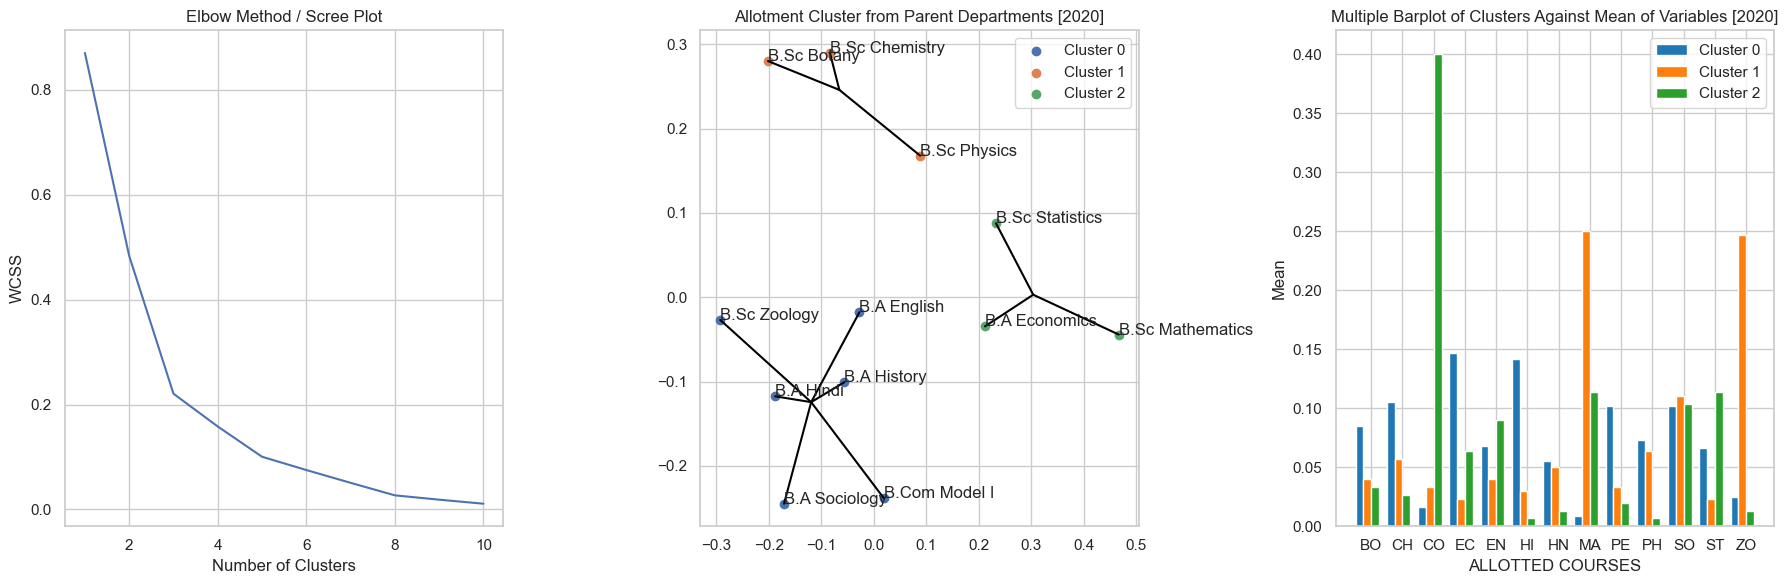

In [371]:
# Allotment 2019
df = allot20_countr.copy()

# Convert dataframe to numpy array
X = df.values

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determining the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Create a single figure with 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Scree Plot
axes[0].plot(range(1, 11), wcss)
axes[0].set_title('Elbow Method / Scree Plot')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('WCSS')

# Subplot 2: Cluster Plot
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
axes[1].set_title('Allotment Cluster from Parent Departments [2020]')
for i in range(n_clusters):
    mask = kmeans.labels_ == i
    cluster_points = X_pca[mask]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    for point in cluster_points:
        axes[1].plot([point[0], kmeans.cluster_centers_[i][0]], [point[1], kmeans.cluster_centers_[i][1]], c='black')
    index_names = df.index[mask]
    for j, point in enumerate(cluster_points):
        axes[1].annotate(index_names[j], (point[0], point[1]))
axes[1].legend()

# Subplot 3: Multiple Barplot
labels = kmeans.labels_
cluster_means = df.groupby(labels).mean()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
n_clusters = len(cluster_means.index)
n_variables = len(cluster_means.columns)
width = 1 / (n_clusters + 1)
for i in range(n_clusters):
    x = np.arange(n_variables) + i * width
    axes[2].bar(x, cluster_means.iloc[i], width=width, label=f'Cluster {i}', color=colors[i])
axes[2].set_xticks(np.arange(n_variables) + width * n_clusters / 2)
axes[2].set_xticklabels(cluster_means.columns)
axes[2].legend()
axes[2].set_xlabel('ALLOTTED COURSES')
axes[2].set_ylabel('Mean')
axes[2].set_title('Multiple Barplot of Clusters Against Mean of Variables [2020]')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("Charts/Cluster-plots/par-cluster-allot-20.png")

# Show the layout
plt.show()


##### CLUSTER TO VARIOUS DEPARTMENTS PROP. 2019 - COLUMN WISE

d:\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


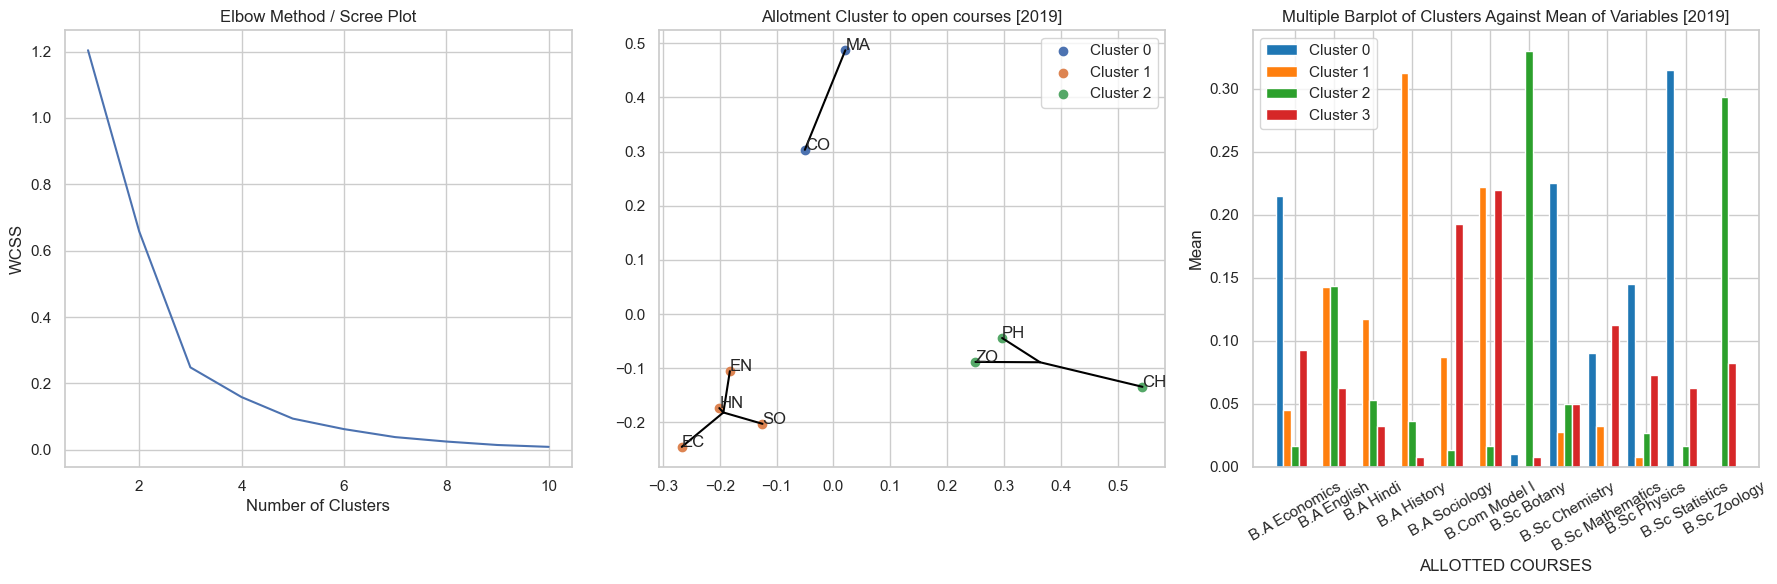

In [372]:
# allotment 2019
df = allot19_countc.copy()

# Transpose the dataframe
df = df.T

# Convert dataframe to numpy array
X = df.values

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determining the optimal no of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Elbow Method / Scree Plot
axs[0].plot(range(1, 11), wcss)
axs[0].set_title('Elbow Method / Scree Plot')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('WCSS')

# Plot 2: K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# Create the plot
axs[1].set_title('Allotment Cluster to open courses [2019]')
for i in range(n_clusters):
    # Select data points for each cluster
    mask = kmeans.labels_ == i
    cluster_points = X_pca[mask]

    # Plot cluster points and connect them with lines
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    for point in cluster_points:
        axs[1].plot([point[0], kmeans.cluster_centers_[i][0]], [point[1], kmeans.cluster_centers_[i][1]], c='black')

    # Label cluster points with their index names
    index_names = df.index[mask]
    for j, point in enumerate(cluster_points):
        axs[1].annotate(index_names[j], (point[0], point[1]))

# Add legend and title
axs[1].legend()

# Plot 3: Multiple Barplot of Clusters Against Mean of Variables
labels = kmeans.labels_
cluster_means = df.groupby(labels).mean()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# plot each cluster's bars for each variable
n_clusters = len(cluster_means.index)
n_variables = len(cluster_means.columns)
width = 1 / (n_clusters + 1)

for i in range(n_clusters):
    x = np.arange(n_variables) + i * width
    axs[2].bar(x, cluster_means.iloc[i], width=width, label=f'Cluster {i}', color=colors[i])

# set the x-axis labels
axs[2].set_xticks(np.arange(n_variables) + width * n_clusters / 2)
axs[2].set_xticklabels(cluster_means.columns, rotation=30)

axs[2].legend()
axs[2].set_xlabel('ALLOTTED COURSES')
axs[2].set_ylabel('Mean')
axs[2].set_title('Multiple Barplot of Clusters Against Mean of Variables [2019]')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("Charts/Cluster-plots/tar-cluster-allot-19.png")

# Show the plots
plt.show()

##### CLUSTER TO VARIOUS DEPARTMENTS PROP. 2020 - COLUMN WISE

d:\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


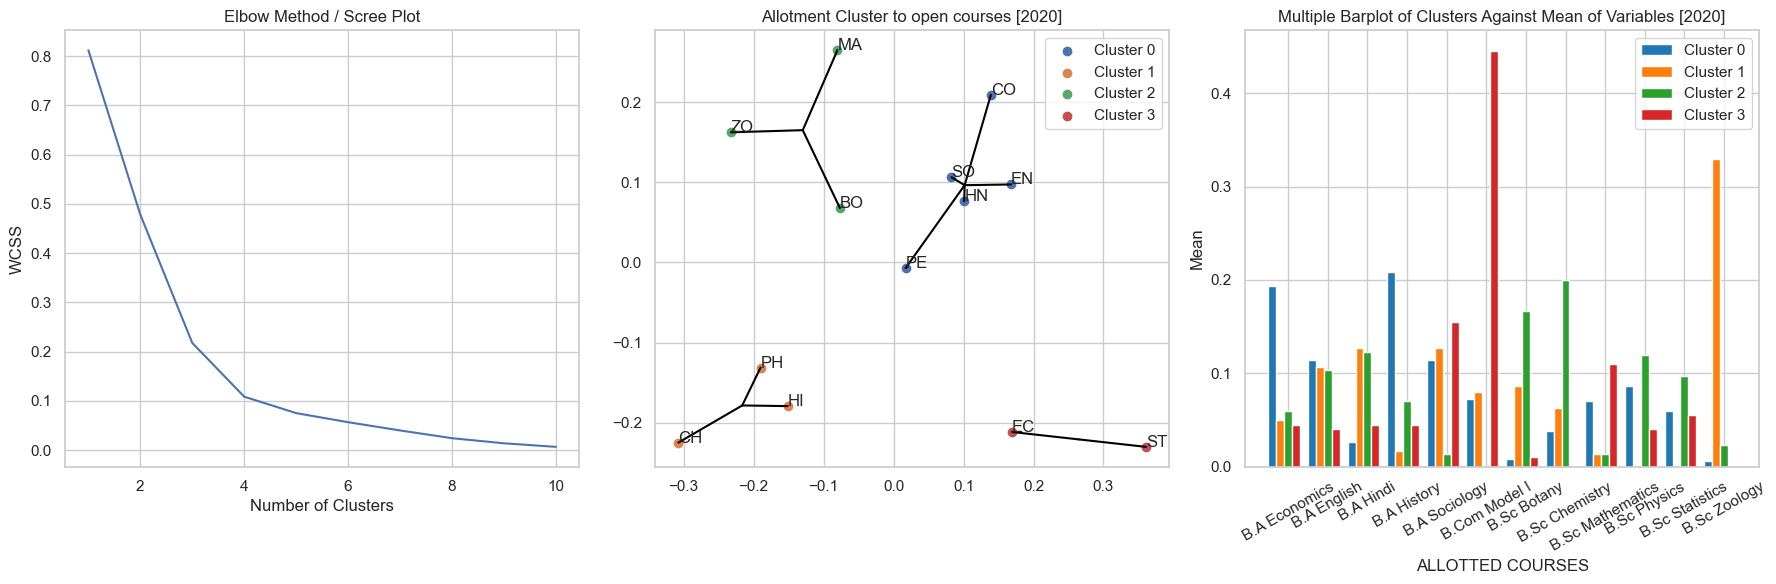

In [373]:
# allotment 2019
df = allot20_countc.copy()

# Transpose the dataframe
df = df.T

# Convert dataframe to numpy array
X = df.values

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determining the optimal no of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Elbow Method / Scree Plot
axs[0].plot(range(1, 11), wcss)
axs[0].set_title('Elbow Method / Scree Plot')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('WCSS')

# Plot 2: K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)

# Create the plot
axs[1].set_title('Allotment Cluster to open courses [2020]')
for i in range(n_clusters):
    # Select data points for each cluster
    mask = kmeans.labels_ == i
    cluster_points = X_pca[mask]

    # Plot cluster points and connect them with lines
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    for point in cluster_points:
        axs[1].plot([point[0], kmeans.cluster_centers_[i][0]], [point[1], kmeans.cluster_centers_[i][1]], c='black')

    # Label cluster points with their index names
    index_names = df.index[mask]
    for j, point in enumerate(cluster_points):
        axs[1].annotate(index_names[j], (point[0], point[1]))

# Add legend and title
axs[1].legend()

# Plot 3: Multiple Barplot of Clusters Against Mean of Variables
labels = kmeans.labels_
cluster_means = df.groupby(labels).mean()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# plot each cluster's bars for each variable
n_clusters = len(cluster_means.index)
n_variables = len(cluster_means.columns)
width = 1 / (n_clusters + 1)

for i in range(n_clusters):
    x = np.arange(n_variables) + i * width
    axs[2].bar(x, cluster_means.iloc[i], width=width, label=f'Cluster {i}', color=colors[i])

# set the x-axis labels
axs[2].set_xticks(np.arange(n_variables) + width * n_clusters / 2)
axs[2].set_xticklabels(cluster_means.columns, rotation=30)

axs[2].legend()
axs[2].set_xlabel('ALLOTTED COURSES')
axs[2].set_ylabel('Mean')
axs[2].set_title('Multiple Barplot of Clusters Against Mean of Variables [2020]')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("Charts/Cluster-plots/tar-cluster-allot-20.png")

# Show the plots
plt.show()

#### FIRST CHOICE CLUSTER

d:\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


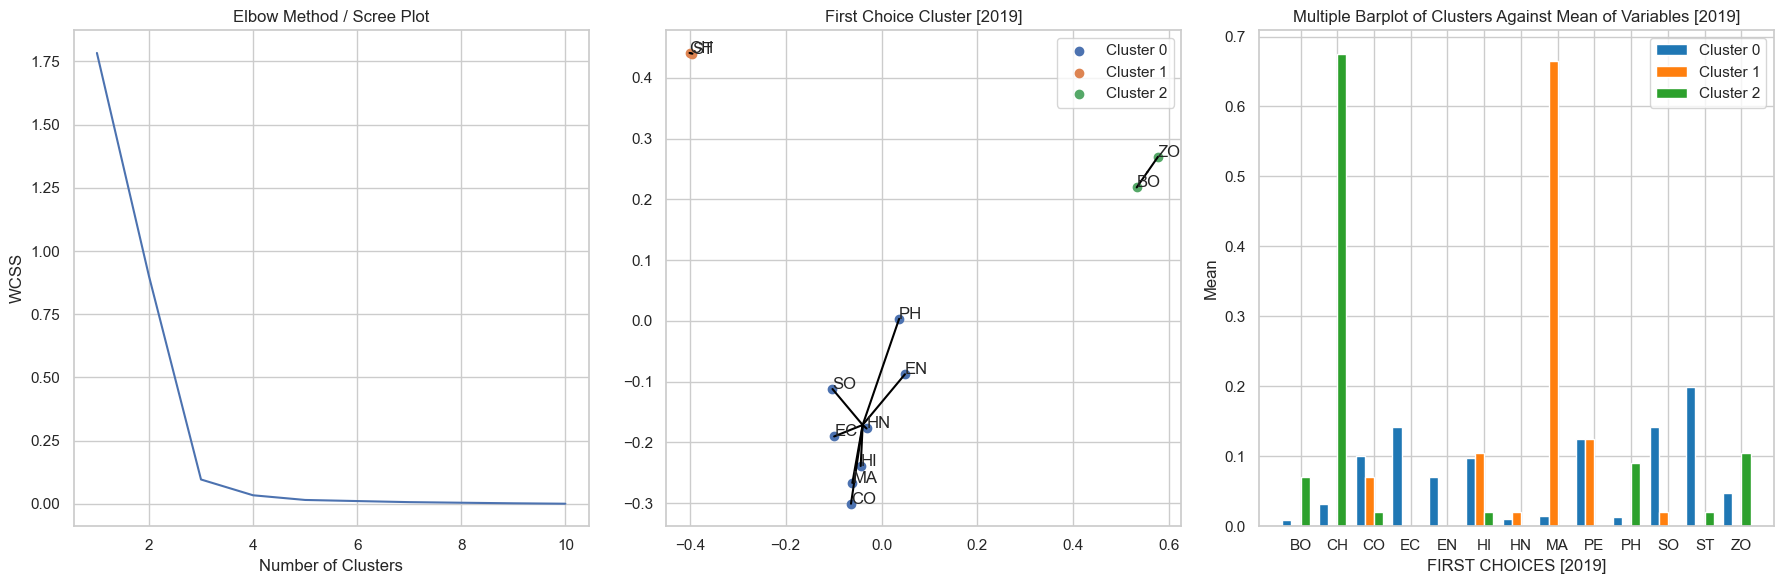

In [374]:
# DataFrame
df = fc_dept19.copy()

# Convert dataframe to numpy array
X = df.values

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determining the optimal no of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Elbow Method / Scree Plot
axs[0].plot(range(1, 11), wcss)
axs[0].set_title('Elbow Method / Scree Plot')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('WCSS')

# Plot 2: K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Create the plot
axs[1].set_title('First Choice Cluster [2019]')
for i in range(3):
    # Select data points for each cluster
    mask = kmeans.labels_ == i
    cluster_points = X_pca[mask]

    # Plot cluster points and connect them with lines
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    for point in cluster_points:
        axs[1].plot([point[0], kmeans.cluster_centers_[i][0]], [point[1], kmeans.cluster_centers_[i][1]], c='black')

    # Label cluster points with their index names
    index_names = df.index[mask]
    for j, point in enumerate(cluster_points):
        axs[1].annotate(index_names[j], (point[0], point[1]))

# Add legend
axs[1].legend()

# Plot 3: Multiple Barplot of Clusters Against Mean of Variables
labels = kmeans.labels_
cluster_means = df.groupby(labels).mean()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# plot each cluster's bars for each variable
cluster_labels = np.unique(labels)
n_clusters = len(cluster_labels)
n_variables = len(cluster_means.columns)
width = 1 / (n_clusters + 1)

for i, label in enumerate(cluster_labels):
    x = np.arange(n_variables) + i * width
    axs[2].bar(x, cluster_means.loc[label], width=width, label=f'Cluster {label}', color=colors[i])

# set the x-axis labels
axs[2].set_xticks(np.arange(n_variables) + width * n_clusters / 2)
axs[2].set_xticklabels(cluster_means.columns)
axs[2].legend()
axs[2].set_xlabel('FIRST CHOICES [2019]')
axs[2].set_ylabel('Mean')
axs[2].set_title('Multiple Barplot of Clusters Against Mean of Variables [2019]')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("Charts/Cluster-plots/FC-19-Cluster.png")

# Show the plots
plt.show()


d:\Softwares\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


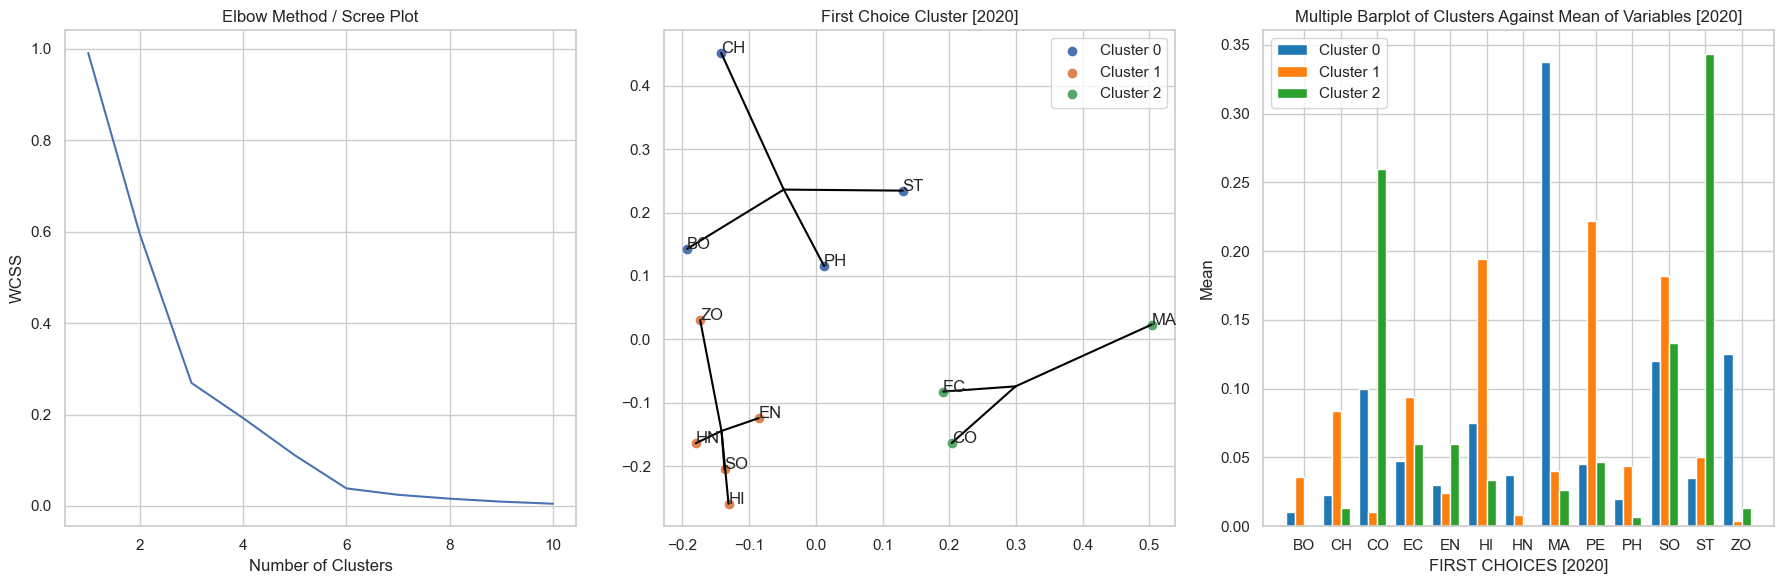

In [375]:
# DataFrame
df = fc_dept20.copy()

# Convert dataframe to numpy array
X = df.values

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Determining the optimal no of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Elbow Method / Scree Plot
axs[0].plot(range(1, 11), wcss)
axs[0].set_title('Elbow Method / Scree Plot')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('WCSS')

# Plot 2: K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Create the plot
axs[1].set_title('First Choice Cluster [2020]')
for i in range(3):
    # Select data points for each cluster
    mask = kmeans.labels_ == i
    cluster_points = X_pca[mask]

    # Plot cluster points and connect them with lines
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    for point in cluster_points:
        axs[1].plot([point[0], kmeans.cluster_centers_[i][0]], [point[1], kmeans.cluster_centers_[i][1]], c='black')

    # Label cluster points with their index names
    index_names = df.index[mask]
    for j, point in enumerate(cluster_points):
        axs[1].annotate(index_names[j], (point[0], point[1]))

# Add legend
axs[1].legend()

# Plot 3: Multiple Barplot of Clusters Against Mean of Variables
labels = kmeans.labels_
cluster_means = df.groupby(labels).mean()

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# plot each cluster's bars for each variable
cluster_labels = np.unique(labels)
n_clusters = len(cluster_labels)
n_variables = len(cluster_means.columns)
width = 1 / (n_clusters + 1)

for i, label in enumerate(cluster_labels):
    x = np.arange(n_variables) + i * width
    axs[2].bar(x, cluster_means.loc[label], width=width, label=f'Cluster {label}', color=colors[i])

# set the x-axis labels
axs[2].set_xticks(np.arange(n_variables) + width * n_clusters / 2)
axs[2].set_xticklabels(cluster_means.columns)
axs[2].legend()
axs[2].set_xlabel('FIRST CHOICES [2020]')
axs[2].set_ylabel('Mean')
axs[2].set_title('Multiple Barplot of Clusters Against Mean of Variables [2020]')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("Charts/Cluster-plots/FC-20-Cluster.png")

# Show the plots
plt.show()


# MULTINOMIAL LOGISTIC REGRESSION 

## MODEL of 2019

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from joblib import dump,load

# Split into X and y
X = df1.iloc[:, 2:9]  # Select columns from FC to GP
y = df1['Allotted Course']


# One-hot encode the categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X))
X_encoded.columns = encoder.get_feature_names_out(X.columns)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Save the trained model
dump(model, 'Model/MNLogReg.joblib')

# Make predictions
y_pred = model.predict(X_test)



In [377]:
# Calculate evaluation metrics for df1
y_pred = model.predict(X_test)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix for 2019:")
print(confusion_matrix)

# Classification report
classification_report = metrics.classification_report(y_test, y_pred,zero_division=1)
print("Classification report for 2019:")
print(classification_report)

# Accuracy score
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score for 2019:", accuracy_score)

# Log loss
y_pred_proba = model.predict_proba(X_test)
log_loss = metrics.log_loss(y_test, y_pred_proba)
print("Log loss for 2019:", log_loss)


Confusion matrix for 2019:
[[1 0 0 0 0 0 0 0 0 2 0 1 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 7 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 2 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 2 0 0 0 0 0 0 1 0 0 0 6]]
Classification report for 2019:
              precision    recall  f1-score   support

          BO       1.00      0.25      0.40         4
          CH       0.75      1.00      0.86         6
          CO       0.78      1.00      0.88         7
          EC       0.80      1.00      0.89         4
          EN       0.88      0.88      0.88         8
          HI       0.80      1.00      0.89         4
          HN       1.00      0.00      0.00         2
          MA       1.00      0.75      0.86         8
          PE       0.80      1.00      0.89         4
          PH       0.6

## MODEL of 2020 

** Here we test the entire Dataset of 2020 using the Trained Model of Multinomial Logistic Regression from the Data of 2019.**

In [378]:
# Load the pre-trained model
model = load('Model/MNLogReg.joblib')

# Preprocess the new dataset
X_new = df2.iloc[:, 2:9]  # Select columns from FC to GP
X_new_encoded = pd.DataFrame(encoder.transform(X_new))
X_new_encoded.columns = encoder.get_feature_names_out(X_new.columns)

# Make predictions on the new dataset
y_pred_new = model.predict(X_new_encoded)


In [379]:
# Calculate evaluation metrics for df2
y_test_new = df2['Allotted Course']

# Confusion matrix
confusion_matrix_new = metrics.confusion_matrix(y_test_new, y_pred_new)
print("Confusion matrix for df2:")
print(confusion_matrix_new)

# Classification report
classification_report_new = metrics.classification_report(y_test_new, y_pred_new,zero_division=1)
print("Classification report for df2:")
print(classification_report_new)

# Accuracy score
accuracy_score_new = metrics.accuracy_score(y_test_new, y_pred_new)
print("Accuracy score for 2020:", accuracy_score_new)

# Log loss
y_pred_proba_new = model.predict_proba(X_new_encoded)
log_loss_new = metrics.log_loss(y_test_new, y_pred_proba_new)
print("Log loss for 2020:", log_loss_new)


Confusion matrix for df2:
[[ 7  0  0  0  0  5  0  1  7  0  4  0  0]
 [ 4  9  0  0  0  3  0  2  1  2  2  3  1]
 [ 0  0 43  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  1 32  0  0  0  1  0  0  1 10  0]
 [ 0  0  0  0 17  1  0  0  7  0  7  2  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0  0]
 [ 1  0  1  0  2  1  2  0  7  0  4  1  1]
 [ 0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0]
 [ 2  0  1  0  1  1  0  5  2  7  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 45  0  0]
 [ 0  0  8  0  2  0  0  0  0  0  0 22  0]
 [ 0  1  0  0  0  2  0  5  2  0  1  1 13]]
Classification report for df2:
              precision    recall  f1-score   support

          BO       0.50      0.29      0.37        24
          CH       0.90      0.33      0.49        27
          CO       0.80      0.96      0.87        45
          EC       1.00      0.71      0.83        45
          EN       0.77      0.50      0.61        34
          HI       0.72      1.00      0.84        33
          HN     